# OWID Dataset COVID19 Visual Analysis + ARIMA Modeling

Dataset: Our world in COVID-19
https://github.com/owid/covid-19-data/raw/master/public/
- this dataset is an amalgamate of many government data sources and John Hopkins University Research Center
- Dataset Codebook is available at the above github link

## Project Purpose
- This project is to shed light on the different attributes that may affect COVID spread and fatalities
- The aim is to discover the important trends, and find the most important demographic factors through visual trend analysis
- Another goal of this project is to develop an ARIMA model to forecast cases and deaths for Canada for the next 30 days
- This project will heavily focus on visualizations and exploratory data analysis, with forecasting as the final component
- Note: the data is being updated everyday and some insights may change over time

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

#Visualization
#!pip install plotly_express
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
#Dataset updated daily; obtained from
url = 'https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv'

In [4]:
OWIDdf = pd.read_csv(url)

In [5]:
df = OWIDdf.copy()

In [6]:
cf = df.copy() # for dash

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92131 entries, 0 to 92130
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92131 non-null  object 
 1   continent                              87759 non-null  object 
 2   location                               92131 non-null  object 
 3   date                                   92131 non-null  object 
 4   total_cases                            89348 non-null  float64
 5   new_cases                              89347 non-null  float64
 6   new_cases_smoothed                     88335 non-null  float64
 7   total_deaths                           79449 non-null  float64
 8   new_deaths                             79607 non-null  float64
 9   new_deaths_smoothed                    88335 non-null  float64
 10  total_cases_per_million                88870 non-null  float64
 11  ne

- many non-null values; 59 columns; ~90k entries; 5 object and 53 float
- columns 43 and thereafter are non-time-series variables and are country-related factors or demographics

## SQL Project
- The following code in this section is for an accompanying SQL project

In [29]:
subset1 = list(df.columns[:25])+['population']

covid_deaths = df[subset1]

In [37]:
subset2 = list(df.columns[0:4])+list(df.columns[25:])

covid_vaccines = df[subset2]

In [70]:
out_path = 'C:/Users/Ramello/Documents/SQL data/'

covid_deaths.to_csv(out_path + 'covid_deaths.csv')
covid_vaccines.to_csv(out_path + 'covid_vaccines.csv')

## Data understanding

In [222]:
#date indexing
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [9]:
df.head(10)

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2020-02-24      AFG      Asia  Afghanistan          1.0        1.0   
2020-02-25      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-26      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-27      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-28      AFG      Asia  Afghanistan          1.0        0.0   
2020-02-29      AFG      Asia  Afghanistan          1.0        0.0   
2020-03-01      AFG      Asia  Afghanistan          1.0        0.0   
2020-03-02      AFG      Asia  Afghanistan          1.0        0.0   
2020-03-03      AFG      Asia  Afghanistan          2.0        1.0   
2020-03-04      AFG      Asia  Afghanistan          4.0        2.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-02-24                 NaN           NaN         NaN                  NaN   
2020-02-25                 NaN           NaN         NaN                  NaN   
2020-02-26                 NaN           NaN         NaN                  NaN   
2020-02-27                 NaN           NaN         NaN                  NaN   
2020-02-28                 NaN           NaN         NaN                  NaN   
2020-02-29               0.143           NaN         NaN                  0.0   
2020-03-01               0.143           NaN         NaN                  0.0   
2020-03-02               0.000           NaN         NaN                  0.0   
2020-03-03               0.143           NaN         NaN                  0.0   
2020-03-04               0.429           NaN         NaN                  0.0   

            total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
date                                 ...                                    
2020-02-24                    0.026  ...        1803.987              NaN   
2020-02-25                    0.026  ...        1803.987              NaN   
2020-02-26                    0.026  ...        1803.987              NaN   
2020-02-27                    0.026  ...        1803.987              NaN   
2020-02-28                    0.026  ...        1803.987              NaN   
2020-02-29                    0.026  ...        1803.987              NaN   
2020-03-01                    0.026  ...        1803.987              NaN   
2020-03-02                    0.026  ...        1803.987              NaN   
2020-03-03                    0.051  ...        1803.987              NaN   
2020-03-04                    0.103  ...        1803.987              NaN   

            cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
date                                                                     
2020-02-24                597.029                 9.59             NaN   
2020-02-25                597.029                 9.59             NaN   
2020-02-26                597.029                 9.59             NaN   
2020-02-27                597.029                 9.59             NaN   
2020-02-28                597.029                 9.59             NaN   
2020-02-29                597.029                 9.59             NaN   
2020-03-01                597.029                 9.59             NaN   
2020-03-02                597.029                 9.59             NaN   
2020-03-03                597.029                 9.59             NaN   
2020-03-04                597.029                 9.59             NaN   

            male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
date                                                                           
2020-02-24           NaN                  37.746                         0.5   
2020-02-25           NaN                  37.746                         0.5   
2020-02-26           NaN                  37.746               

In [10]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Location labels include continents, world(average), countries, districts.

In [8]:
df.tests_units.unique()

array([nan, 'tests performed', 'people tested', 'units unclear',
       'samples tested'], dtype=object)

units used by location to report testing data

In [12]:
df.index.min() #first date of data collection

Timestamp('2020-01-01 00:00:00')

- due to the data being relatively recent, with varying underreporting rates by region, some data is unavailable, especially during the earlier dates
- some columns have less than 10000 non-null values but are still useful for visual analysis. ie. new vaccinations

In [13]:
df.describe()
#many nonsensical negative values like -min in new_deaths columns
#may be due to discrepancies in reporting the total cases/deaths

total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  8.934800e+04   89347.000000        88335.000000  7.944900e+04   
mean   9.349480e+05    6060.998937         6071.702036  2.520102e+04   
std    6.454588e+06   38295.592800        37854.961432  1.502081e+05   
min    1.000000e+00 -348667.000000        -6223.000000  1.000000e+00   
25%    1.081000e+03       2.000000            7.143000  4.900000e+01   
50%    1.186750e+04      71.000000           88.286000  3.370000e+02   
75%    1.260442e+05     787.000000          825.642500  3.288000e+03   
max    1.699570e+08  905992.000000       826374.286000  3.533619e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  79607.000000         88335.000000             88870.000000   
mean     142.267791           126.990236             11471.122938   
std      781.519354           720.516356             21625.767036   
min    -1918.000000          -232.143000                 0.001000   
25%        0.000000             0.000000               224.521000   
50%        2.000000             1.286000              1539.897500   
75%       18.000000            14.143000             11429.622500   
max    17906.000000         14436.286000            177221.252000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           88869.000000                    87862.000000   
mean               76.054068                       76.199251   
std               200.492606                      157.608400   
min             -5160.525000                     -276.825000   
25%                 0.207000                        1.228000   
50%                 7.952000                       10.498500   
75%                70.650000                       79.109250   
max             18293.675000                     4083.500000   

       total_deaths_per_million  ...  gdp_per_capita  extreme_poverty  \
count              78984.000000  ...    82934.000000     56103.000000   
mean                 250.283529  ...    19294.860364        13.379869   
std                  437.063677  ...    19961.896664        19.953896   
min                    0.001000  ...      661.240000         0.100000   
25%                    7.418250  ...     4466.507000         0.600000   
50%                   45.008500  ...    12951.839000         2.200000   
75%                  274.841000  ...    27216.445000        21.200000   
max                 3075.354000  ...   116935.600000        77.600000   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
count           83120.000000         85023.000000    65071.000000   
mean              258.116636             7.883296       10.540440   
std               118.885014             4.072786       10.428721   
min                79.370000             0.990000        0.100000   
25%               167.295000             5.310000        1.900000   
50%               242.648000             7.110000        6.300000   
75%               329.635000            10.080000       19.300000   
max               724.417000            30.530000       44.000000   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
count  64116.000000            41763.000000                75787.000000   
mean      32.673052               50.874821                    3.028824   
std       13.476614               31.761407                    2.461070   
min        7.700000                1.188000                    0.100000   
25%       21.600000               20.859000                    1.300000   
50%       31.400000               49.839000                    2.400000   
75%       41.100000               83.241000                    3.861000   
max       78.100000              100.000000                   13.800000   

       life_expectancy  human_development_index  
count     87479.000000             83299.000000  
mean         73.231683                 0.727727  
std           7.562994                 0.150399  
min 

## Distributions 

In [14]:
today = str(datetime.today().date())

df_recent = df['2021-05-20'] #some countries may not be up to date if calling today()
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2021-05-20 to 2021-05-20
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               219 non-null    object 
 1   continent                              210 non-null    object 
 2   location                               219 non-null    object 
 3   total_cases                            201 non-null    float64
 4   new_cases                              201 non-null    float64
 5   new_cases_smoothed                     200 non-null    float64
 6   total_deaths                           193 non-null    float64
 7   new_deaths                             193 non-null    float64
 8   new_deaths_smoothed                    200 non-null    float64
 9   total_cases_per_million                200 non-null    float64
 10  new_cases_per_million                  200 non-null    

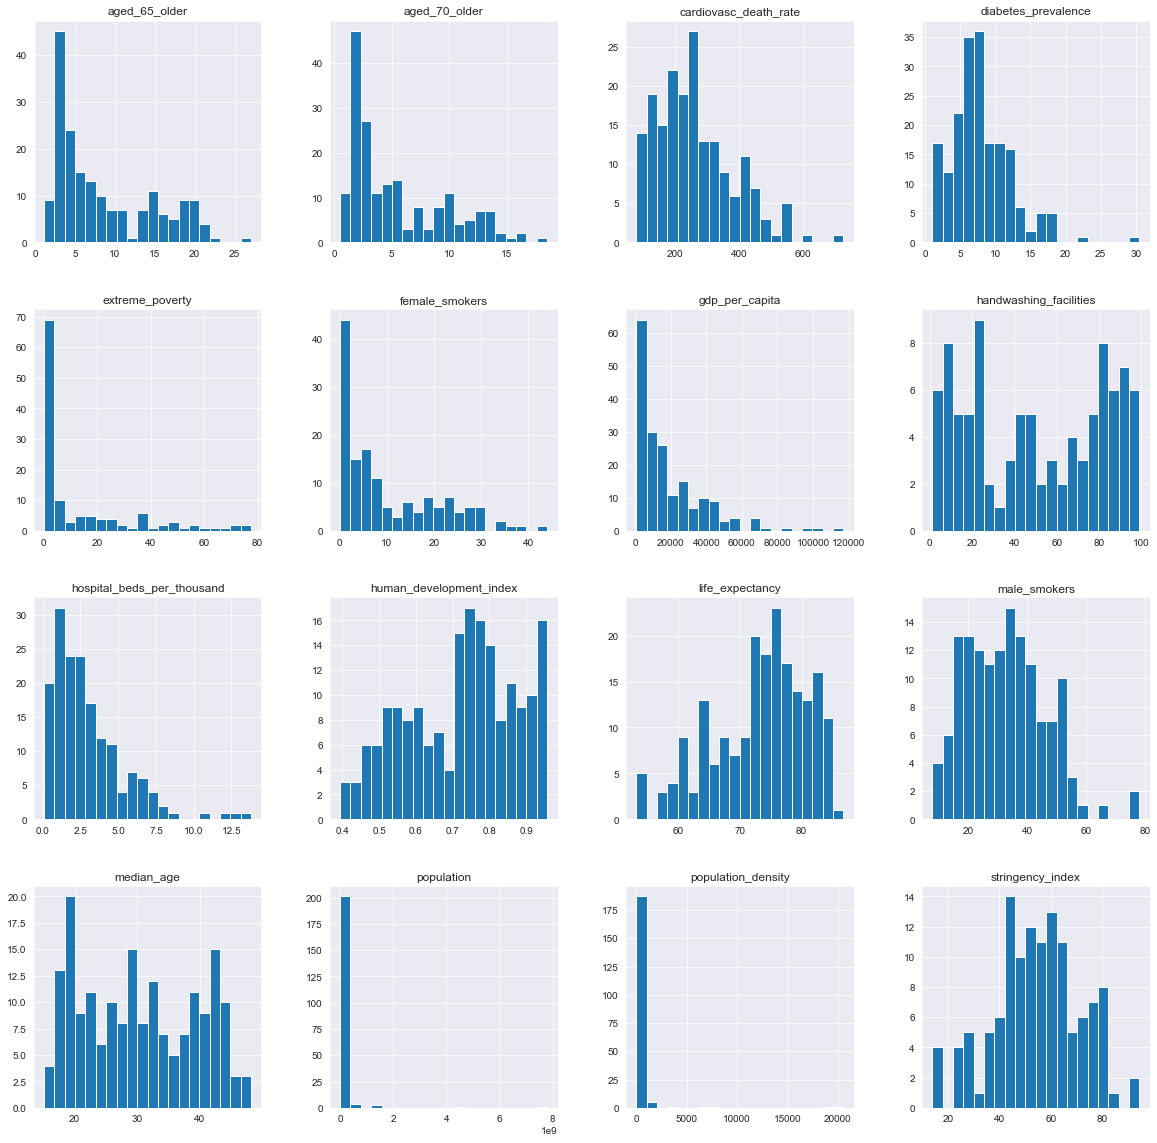

In [113]:
#non-time series data
df_recent.iloc[:, 42:].hist(bins=20, figsize=(20,20))
plt.show()

- population and population density are heavily skewed

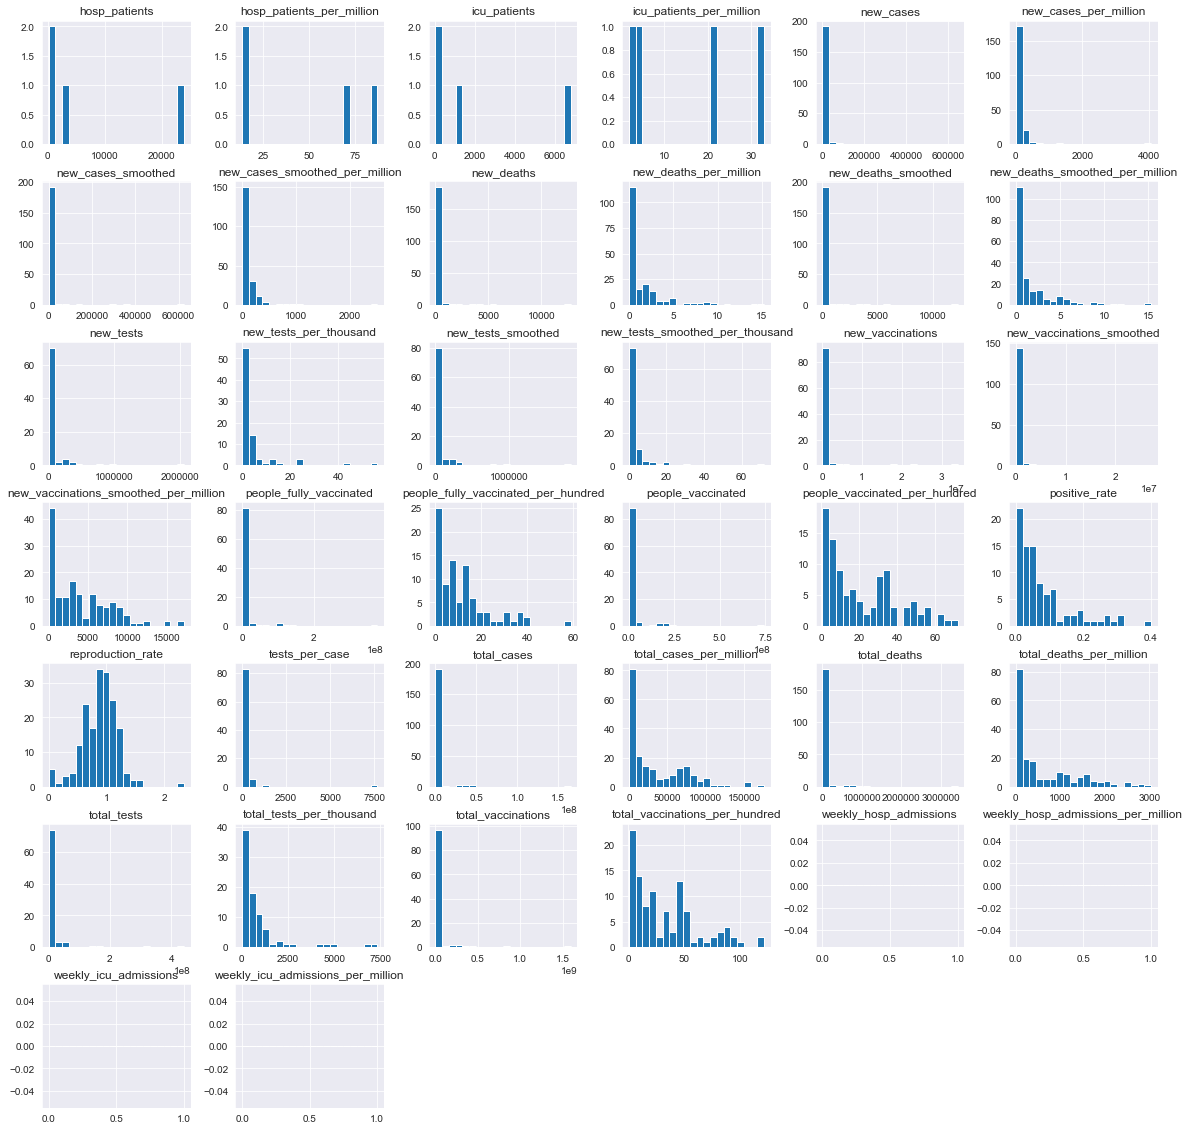

In [114]:
#time series data
df_recent.iloc[:, :42].hist(bins=20, figsize=(20,20))
plt.show()

## Feature Generation
- Crude Mortality : total COVID19 Deaths / total population
- Case Fatality : total COVID19 Deaths / Confirmed COVID19 cases
    - OWID states this metric may be innacurate due to not knowing true confirmed COVID19 cases 

In [17]:
#Crude Mortality
df['crude_mortality'] = df.total_deaths / df.population

In [18]:
#CFR
df['case_fatality'] = df.total_deaths / df.total_cases

In [50]:
aggdf = df.groupby('location').agg(['max']) #max finds most recent total_column data regardless of date
aggdf.columns = aggdf.columns.droplevel(1)
aggdf.reset_index(inplace=True)

In [55]:
CM_CFR_view = aggdf.sort_values(by='crude_mortality', ascending=False)[['location','crude_mortality','case_fatality']].dropna()
CM_CFR_view

location  crude_mortality  case_fatality
93                  Hungary     3.075354e-03       0.141134
54                  Czechia     2.810818e-03       0.035402
27   Bosnia and Herzegovina     2.807534e-03       0.062145
177              San Marino     2.651895e-03       0.138889
153         North Macedonia     2.590982e-03       0.060536
..                      ...              ...            ...
24                   Bhutan     1.295988e-06       0.001297
34                  Burundi     5.045926e-07       0.200000
224                 Vietnam     4.828507e-07       0.033461
114                    Laos     4.123396e-07       0.001575
203                Tanzania     3.515573e-07       0.093750

[192 rows x 3 columns]

# Exploring the Data
- this dataset has non-time series variables at column 43 and afterward
- target variables are deaths and cases
    - note the difference in population scales, in which case total_deaths_per_million is used

## COVID19 Globally 

In [198]:
#single plot
def create_ts(country='World', feature='new_cases_smoothed', **kwargs):
    
    fig, ax = plt.subplots(figsize=(13,5))
        
    ax.plot(df[df.location==country][feature],
           linestyle=line, 
           label=feature,
           c=c)
    ax.set(xlabel = '',
          ylabel='Cases',
          title = f'{feature} in {country} from {df.index.min().date()} to {df.index.max().date()}')
    ax.legend(fontsize='x-large')

In [ ]:
#subplot 
def subplot_ts(country='World', feature='new_cases_smoothed', ax=None, **kwargs):
    ax = ax or plt.gca()
    
    ax.plot(df[df.location==country][feature], label=feature, **kwargs)
    ax.legend(fontsize='large')
    return ax

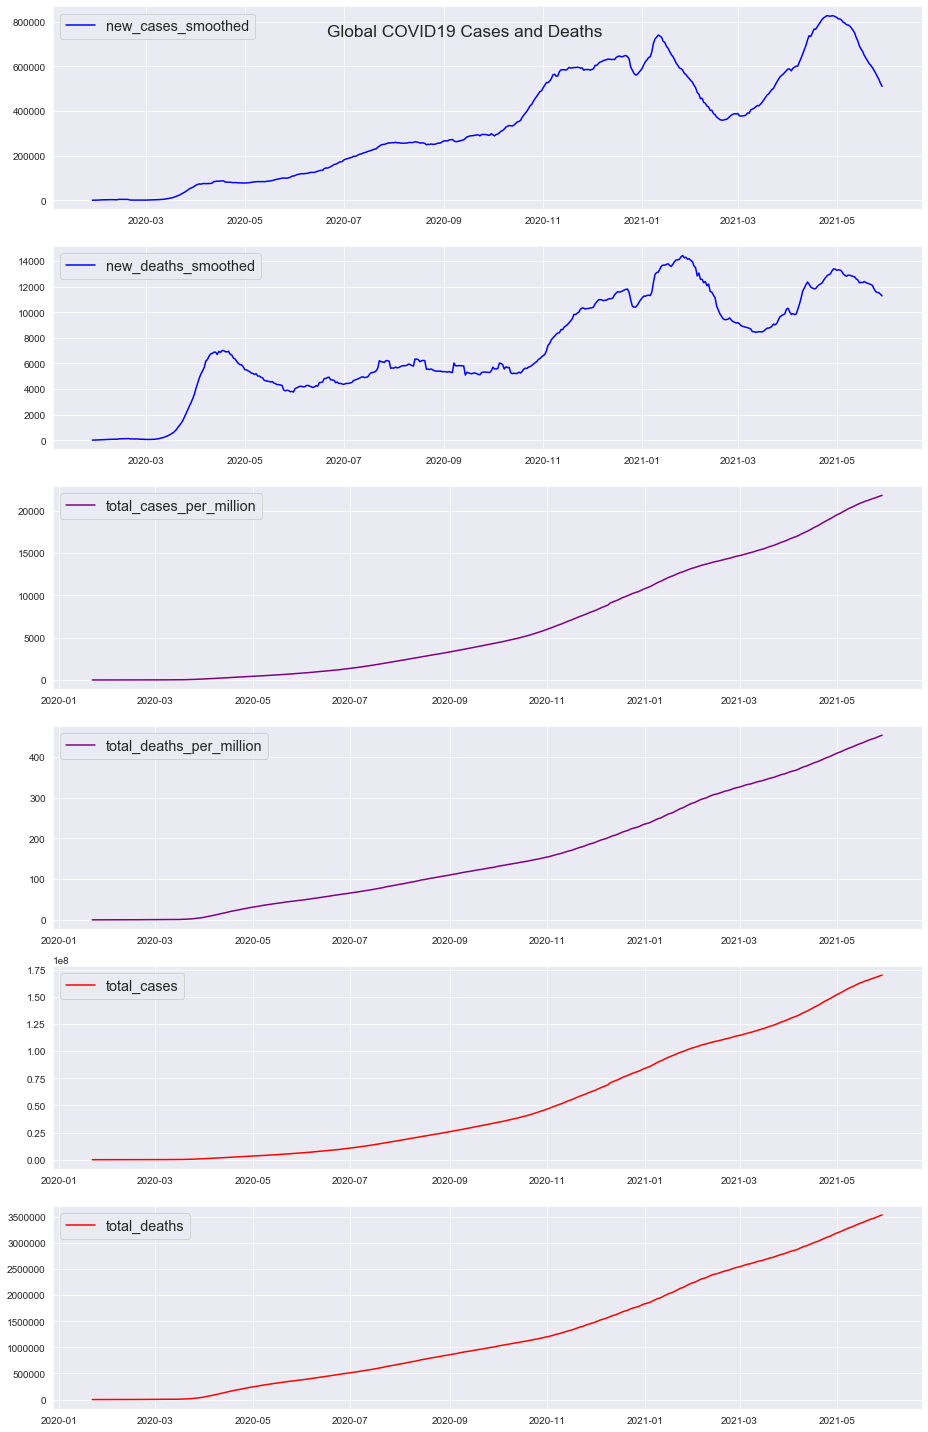

In [210]:
def tstemplate(country='World', feature='new_cases_smoothed', **kwargs):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(13,20))

    subplot_ts(feature='new_cases_smoothed', ax=ax1, color='blue')
    subplot_ts(feature='new_deaths_smoothed', ax=ax2, color='blue')
    subplot_ts(feature='total_cases_per_million', ax=ax3, color='purple')    
    subplot_ts(feature='total_deaths_per_million', ax=ax4, color='purple')
    subplot_ts(feature='total_cases', ax=ax5, color='red')
    subplot_ts(feature='total_deaths', ax=ax6, color='red')
    fig.suptitle('Global COVID19 Cases and Deaths', fontsize='xx-large')
    plt.tight_layout()
tstemplate()

## By Continent

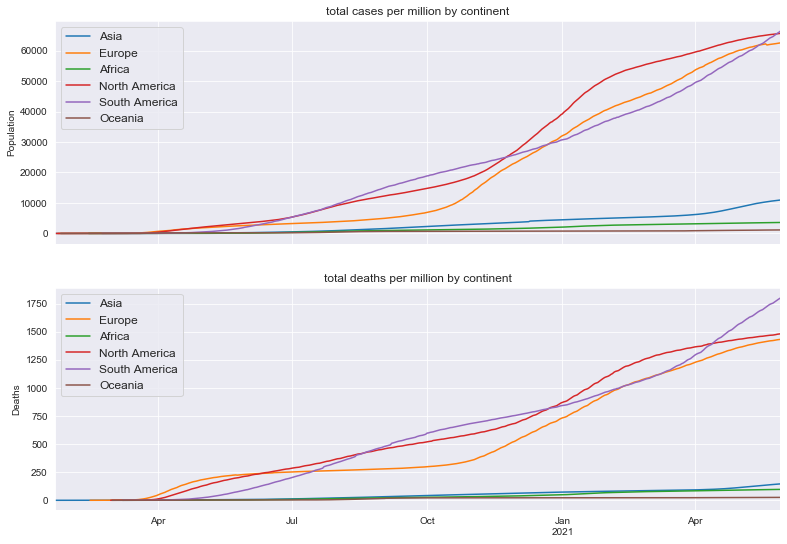

In [68]:
fig, ax = plt.subplots(2, 1, figsize=(13,9), sharex=True)

continents = [x for x in df.continent.unique() if str(x) != 'nan']

for i in continents:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-')
ax[0].set(xlabel = '', ylabel='Population', title = 'total cases per million by continent')  
#ax[0].annotate('Africa', xy=(df.index.max(),4000000), fontsize=12)
ax[0].legend(continents, fontsize='large')

for i in continents:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-')
ax[1].set(xlabel = '', ylabel='Deaths', title = 'total deaths per million by continent') 
#ax[1].annotate('Africa', xy=(df.index.max(),110000), fontsize=12)
ax[1].legend(continents, loc='upper left',fontsize= 'large')

plt.show()

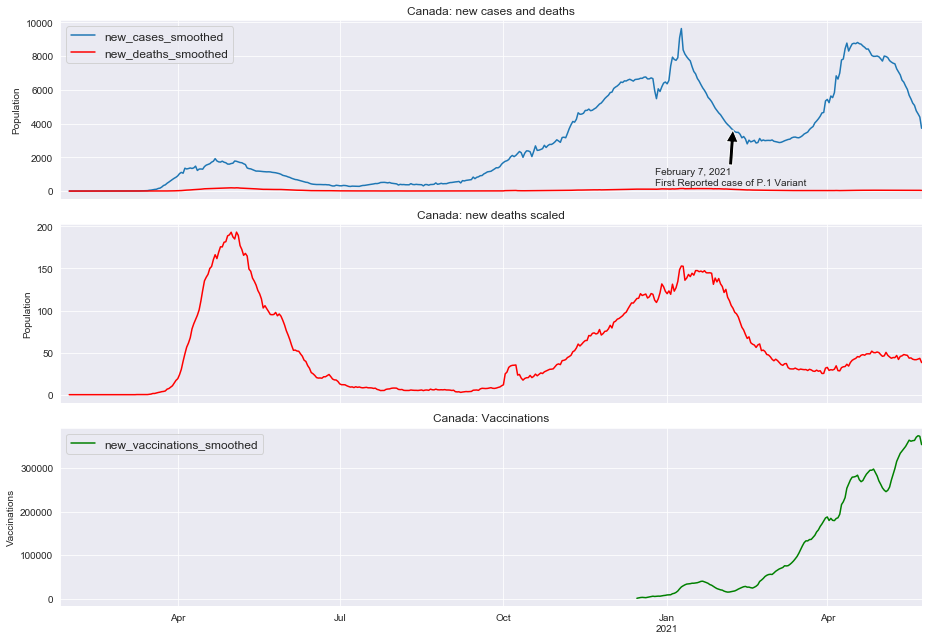

In [119]:
#lets take a look at Canada
odf_canada = df[df.location=='Canada']

fig, ax = plt.subplots(3, 1, figsize=(13,9), sharex=True)
for x, y in enumerate([odf_canada.new_cases_smoothed]):
    y.plot(ax=ax[0], linestyle='-')
for x, y in enumerate([odf_canada.new_deaths_smoothed]):
    y.plot(ax=ax[0], linestyle='-', color='r')
for x, y in enumerate([odf_canada.new_deaths_smoothed]):
    y.plot(ax=ax[1], linestyle='-', color='r')
for x, y in enumerate([odf_canada.new_vaccinations_smoothed]):
    y.plot(ax=ax[2], linestyle='-', color='g')  

ax[0].set(xlabel = '', ylabel='Population', title = 'Canada: new cases and deaths')
ax[1].set(xlabel = '', ylabel='Population', title = 'Canada: new deaths scaled')
ax[2].set(xlabel = '', ylabel='Vaccinations', title = 'Canada: Vaccinations')

ax[0].legend(loc='upper left', fontsize='large')
ax[2].legend(loc='upper left', fontsize='large')
ax[0].annotate('February 7, 2021\nFirst Reported case of P.1 Variant',
               xy=('2021-02-07', odf_canada.new_cases_smoothed['2021-02-07']),
               xycoords = 'data', xytext=('2020-12-25',1400),
               arrowprops=dict(facecolor='black'),
               horizontalalignment='left',
               verticalalignment='top')

plt.tight_layout()

- entering the 3rd wave of the pandemic in april which may have been affected by variants
- vaccine rollout still gaining

In [215]:
df.reset_index(inplace=True)

In [217]:
df.date.dt.month

0        2
1        2
2        2
3        2
4        2
        ..
92126    5
92127    5
92128    5
92129    5
92130    5
Name: date, Length: 92131, dtype: int64

## Vaccinations vs Deaths
- vaccines rollouts 
- the effects of large scale vaccinations will take a longer time-frame to visualize a clear effect

In [120]:
def timeplot(loc, case1, case2):
    fig, ax = plt.subplots(figsize=(14,7))
    for x, y in enumerate([df[df.location==loc][case1]]):
        y.plot(ax=ax, linestyle='-')
    for x, y in enumerate([df[df.location==loc][case2]]):
        y.plot(ax=ax, linestyle='-', color = 'r')
    #for x, y in enumerate([odf_canada.total_tests]):
    #    y.plot(ax=ax, linestyle='-')
    #for x, y in enumerate([odf_canada.total_vaccinations]):
    #    y.plot(ax=ax, linestyle='-')

    ax.set_title(''+case1+' vs '+case2, fontsize='xx-large')
    ax.legend(loc = 'upper left', fontsize='x-large')

In [121]:
def vtplot(case='Canada'):
    
    fig, host = plt.subplots(figsize=(12,6))
    par1 = host.twinx()
    par1.set_ylim(auto=True)

    host.set_ylabel('Total cases and vaccinations', fontsize=14)
    par1.set_ylabel('Total deaths', fontsize=14)

    for x, y in enumerate([df[df.location==case].total_cases.dropna()]):
        y.plot(ax=host, linestyle='-')
    for x, y in enumerate([df[df.location==case].total_deaths.dropna()]):
        y.plot(ax=par1, linestyle='--', color = 'r')
    for x, y in enumerate([df[df.location==case].total_vaccinations.dropna()]):
        y.plot(ax=host, linestyle='-', color='g')
    host.legend(labels=['total_cases','total_vaccinations'], loc='upper left', fontsize='x-large')
    par1.legend(labels=['total_deaths'], loc='upper right', fontsize='x-large')

    host.set_title(case, fontsize='xx-large')

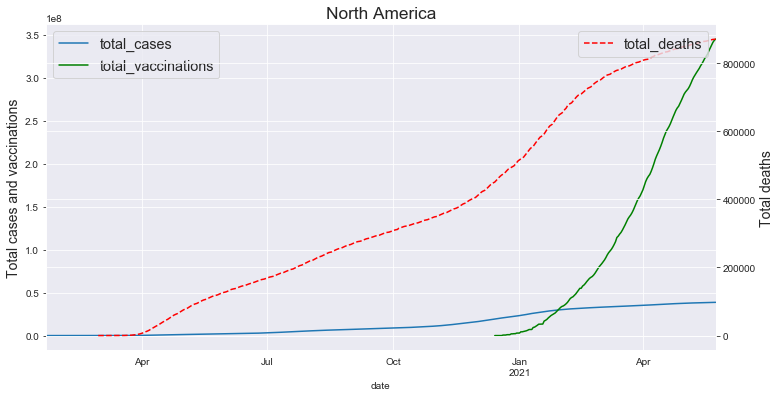

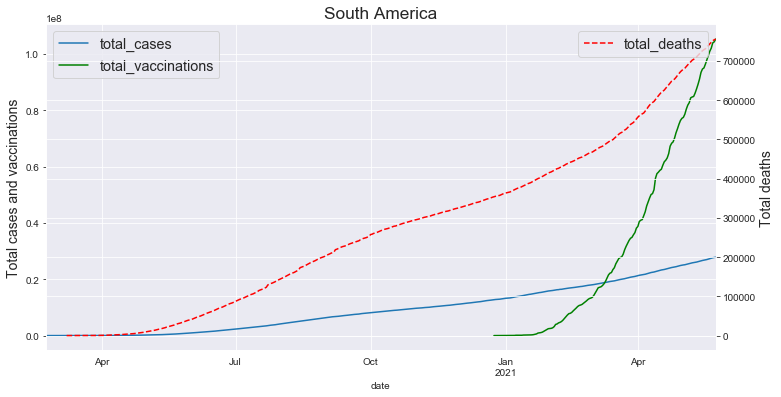

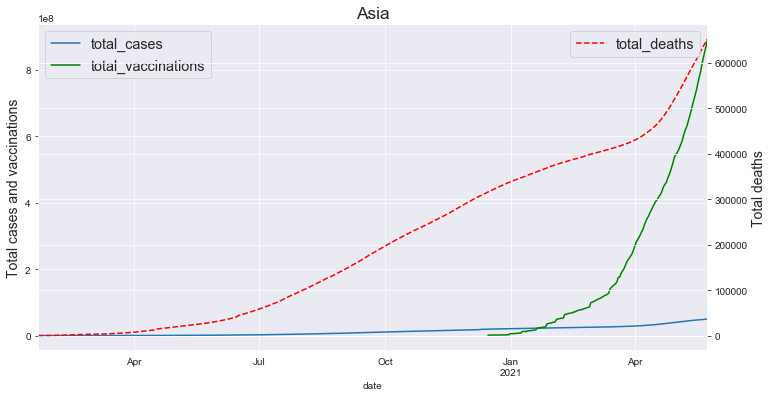

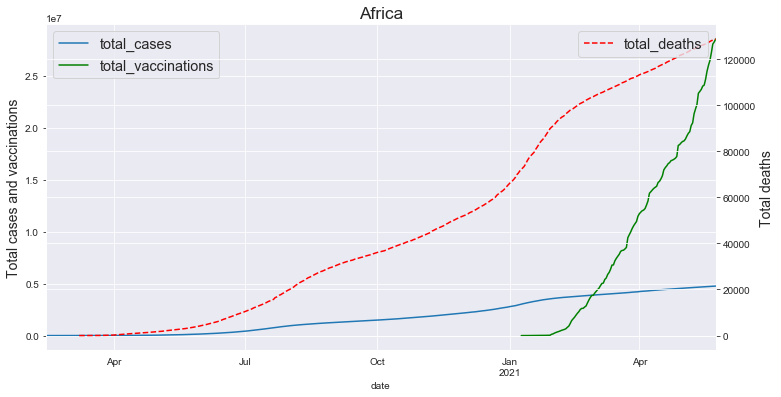

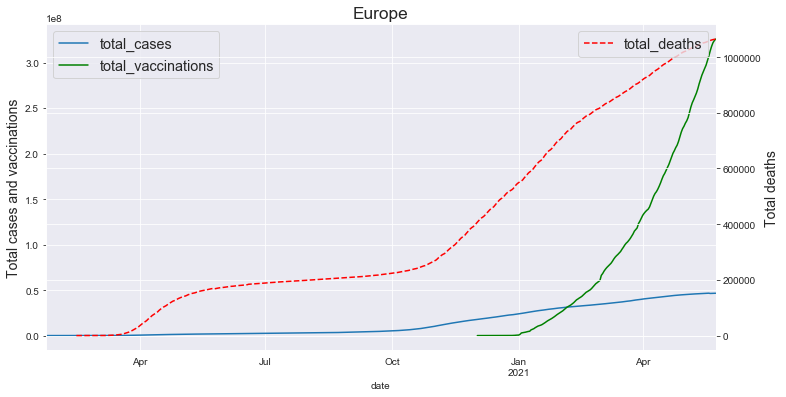

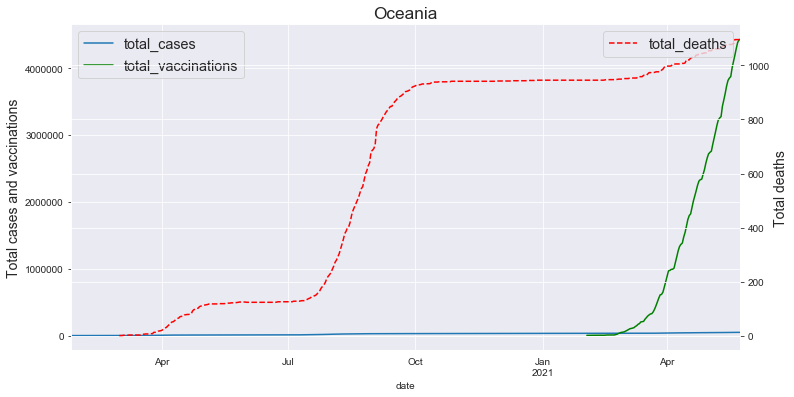

In [122]:
vtplot('North America')
vtplot('South America')
vtplot('Asia')
vtplot('Africa')
vtplot('Europe')
vtplot('Oceania')

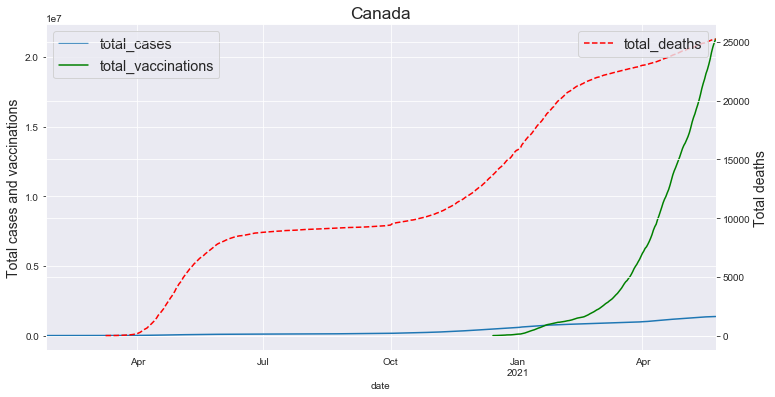

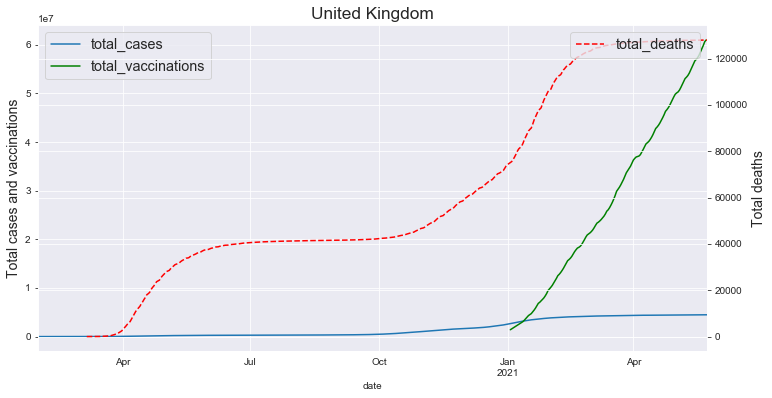

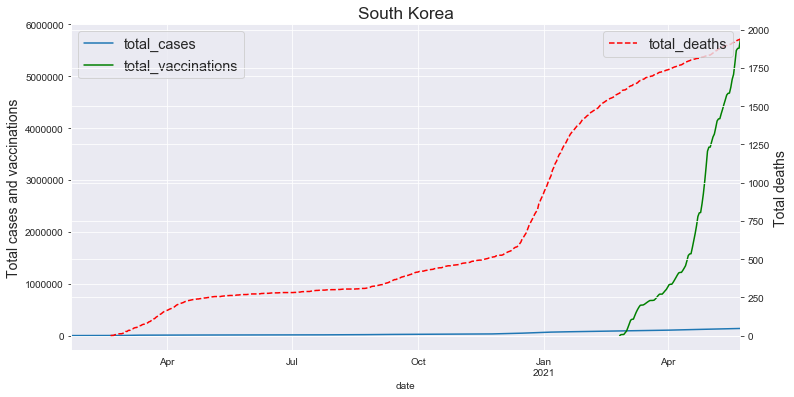

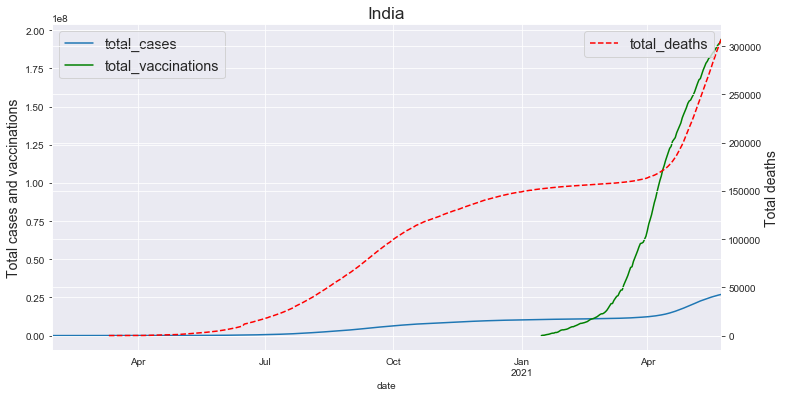

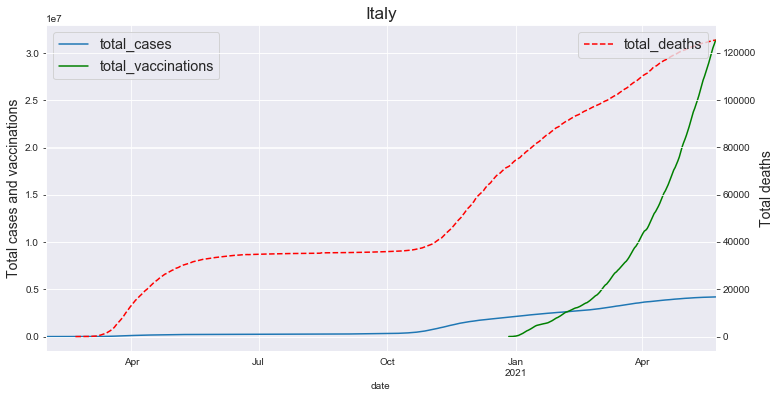

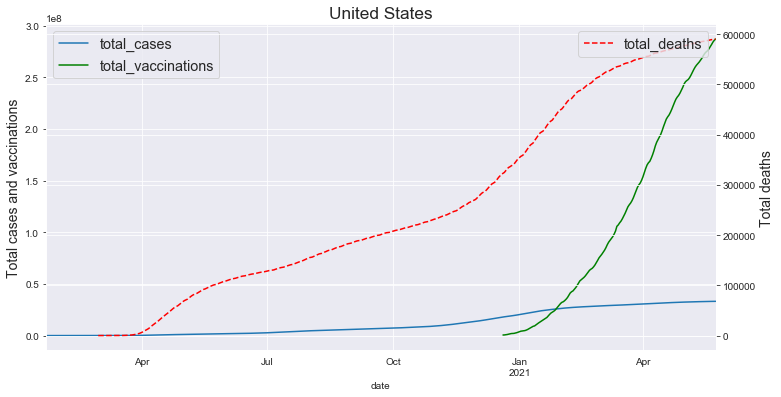

In [123]:
vtplot('Canada')
vtplot('United Kingdom')
vtplot('South Korea')
vtplot('India')
vtplot('Italy')
vtplot('United States')

- some cases of plateauing with higher vaccine count, especially in United States with a successful vaccine rollout
- As of May 1, 2021: cases in India are skyrocketing with the current wave and vaccine rollout cannot keep up with infection rate

## Chloropleth visualizations
- using plotly express for interactive visualizations

In [115]:
import plotly_express as px

In [124]:
odf_nocontinent = df[-df.location.isin(['World','European Union','North America',
                                        'South America','Asia','Africa','Europe','Oceania'])] # Removing Continents
#only take the max of each grouping
odf_totalcases = odf_nocontinent.groupby(odf_nocontinent['location']).agg(['max'])
odf_totalcases.columns = odf_totalcases.columns.droplevel(1)

## total_cases and total_deaths

In [125]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color='total_cases',
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

## total_deaths 
- similar to total_cases

In [41]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color='total_deaths',
                    hover_name=odf_totalcases.index, 
                    hover_data=['population_density','stringency_index','human_development_index'],
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

## Life expectancy

In [42]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color=odf_totalcases.life_expectancy,
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.diverging.curl,
                    color_continuous_midpoint=20)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

## Median Age
- median age may be an important factor in determining how fatal the virus will be on populations
- generally, populations with higher median age are at risk for a higher crude mortality, ie. Italy, Spain, Portugal
- however, countries like Japan, even while having one of the highest median ages do not have the same death rate within their population cohort

In [43]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color=odf_totalcases.median_age,
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.diverging.curl,
                    color_continuous_midpoint=20)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [127]:
odf_ma40 = odf_totalcases[odf_totalcases.median_age>40]
odf_ma20 = odf_totalcases[odf_totalcases.median_age<20]

top5_ma = odf_totalcases.sort_values(by='median_age', ascending=False).head(5).index.tolist()
bot5_ma = odf_totalcases.sort_values(by='median_age', ascending=True).head(5).index.tolist()

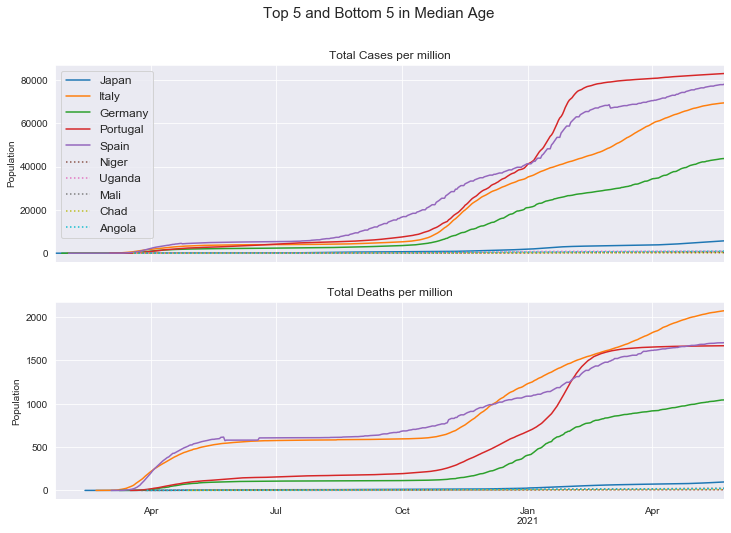

In [129]:
fig, ax = plt.subplots(2,1,figsize=(12,8), sharex=True)

for i in top5_ma:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-')
for i in bot5_ma:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='dotted')
        
for i in top5_ma:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-')
for i in bot5_ma:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='dotted')

ax[0].set(xlabel = '', ylabel='Population', title='Total Cases per million')
#ax[0].set_title('Total Cases per million',fontsize=20)
ax[0].legend(top5_ma+bot5_ma, fontsize='large')
ax[1].set(xlabel = '', ylabel='Population', title='Total Deaths per million')  
#ax[1].set_title('Total Deaths per million',fontsize=20)
fig.suptitle('Top 5 and Bottom 5 in Median Age', fontsize=15)

plt.show()

- Even though japan has the highest median age, they are among the lowest deaths in their population cohort 

## Stringency Index
- composite index measuring how strict a region's government response was
- takes into account stay-at-home-orders, public, private closures and travel bans
- High stringency index : strict governing, policies, enforcement, curfews
- Low stringency index : 'laissez-faire' style response

In [130]:
zf = pd.DataFrame(df.groupby(by=['iso_code', 'location']).agg(['mean']))
zf.reset_index(inplace=True)
zf.columns = zf.columns.droplevel(1)

In [131]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color='stringency_index',
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.sequential.deep,
                    title='Maximum Stringency')
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [132]:
fig = px.choropleth(zf, locations='iso_code',
                    color='stringency_index',
                    hover_name='location', 
                    color_continuous_scale=px.colors.sequential.deep, title='Average Stringency')
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [133]:
print(px.colors.sequential.deep)

['rgb(253, 253, 204)', 'rgb(206, 236, 179)', 'rgb(156, 219, 165)', 'rgb(111, 201, 163)', 'rgb(86, 177, 163)', 'rgb(76, 153, 160)', 'rgb(68, 130, 155)', 'rgb(62, 108, 150)', 'rgb(62, 82, 143)', 'rgb(64, 60, 115)', 'rgb(54, 43, 77)', 'rgb(39, 26, 44)']


In [134]:
top5_si = zf.sort_values(by='stringency_index', ascending=False).head(70).location.tolist()
bot5_si = zf.sort_values(by='stringency_index', ascending=True).head(70).location.tolist()

Text(0.5, 0.98, 'Highest (violet) and Lowest (teal) Stringency Index')

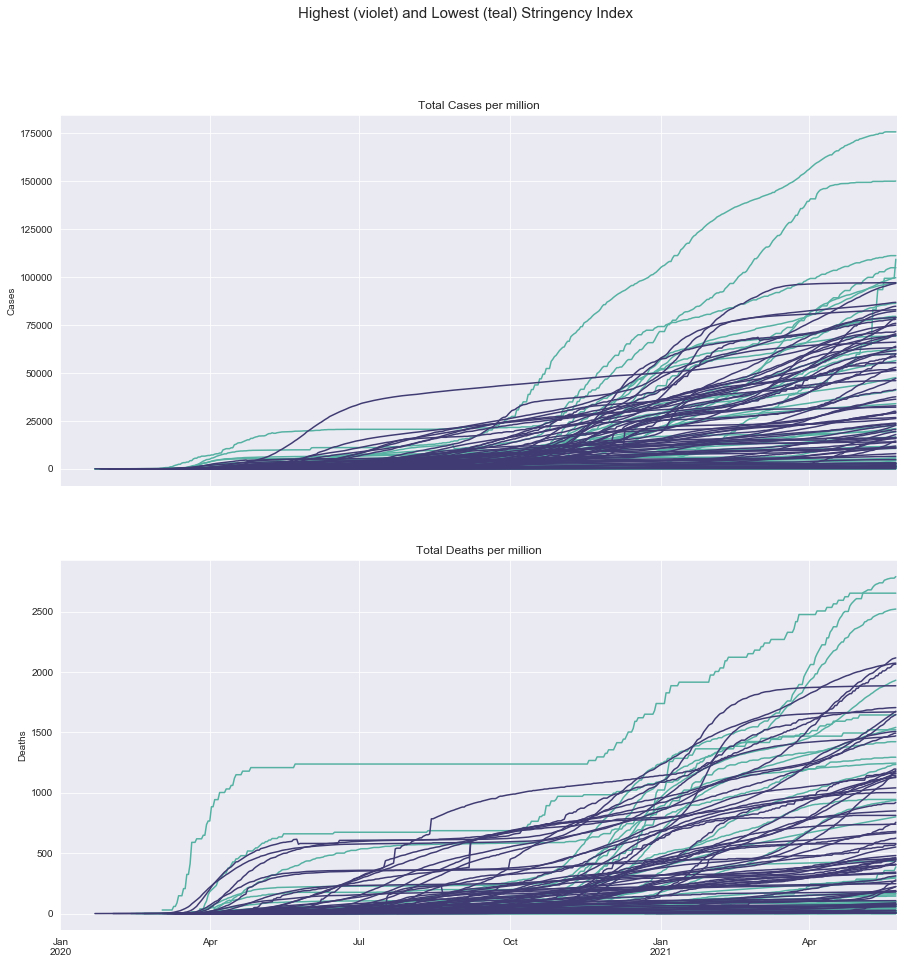

In [135]:
#top/bottom 70 in stringency index
fig, ax = plt.subplots(2,1,figsize=(15,15), sharex=True)

for i in bot5_si:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-', color='#56b1a3')
for i in top5_si:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-', color='#403c73')
for i in bot5_si:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-', color='#56b1a3')
        #ax[1].annotate(i, xy=(odf.index.max(), odf[odf.location==i].total_deaths_per_million.max()))
for i in top5_si:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-', color='#403c73')
        #ax[1].annotate(i, xy=(odf.index.max(), odf[odf.location==i].total_deaths_per_million.max()))
    
ax[0].set(xlabel = '', ylabel='Cases', title='Total Cases per million')
#ax[0].set_title('Total Cases per million',fontsize=20)
#ax[0].legend(top5_si+bot5_si, fontsize='medium')
ax[1].set(xlabel = '', ylabel='Deaths', title='Total Deaths per million')  
#ax[1].set_title('Total Deaths per million',fontsize=20)
fig.suptitle('Highest (violet) and Lowest (teal) Stringency Index', fontsize=15)

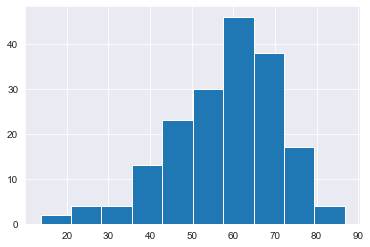

In [137]:
zf.stringency_index.hist()
plt.show()

In [138]:
stringency_up50 = zf[zf.stringency_index > 50]
stringency_down50 = zf[zf.stringency_index < 50]

In [139]:
print(stringency_up50.shape[0], stringency_down50.shape[0])

135 46


Text(0.5, 0.98, 'Highest (violet) and Lowest (teal) Stringency Index')

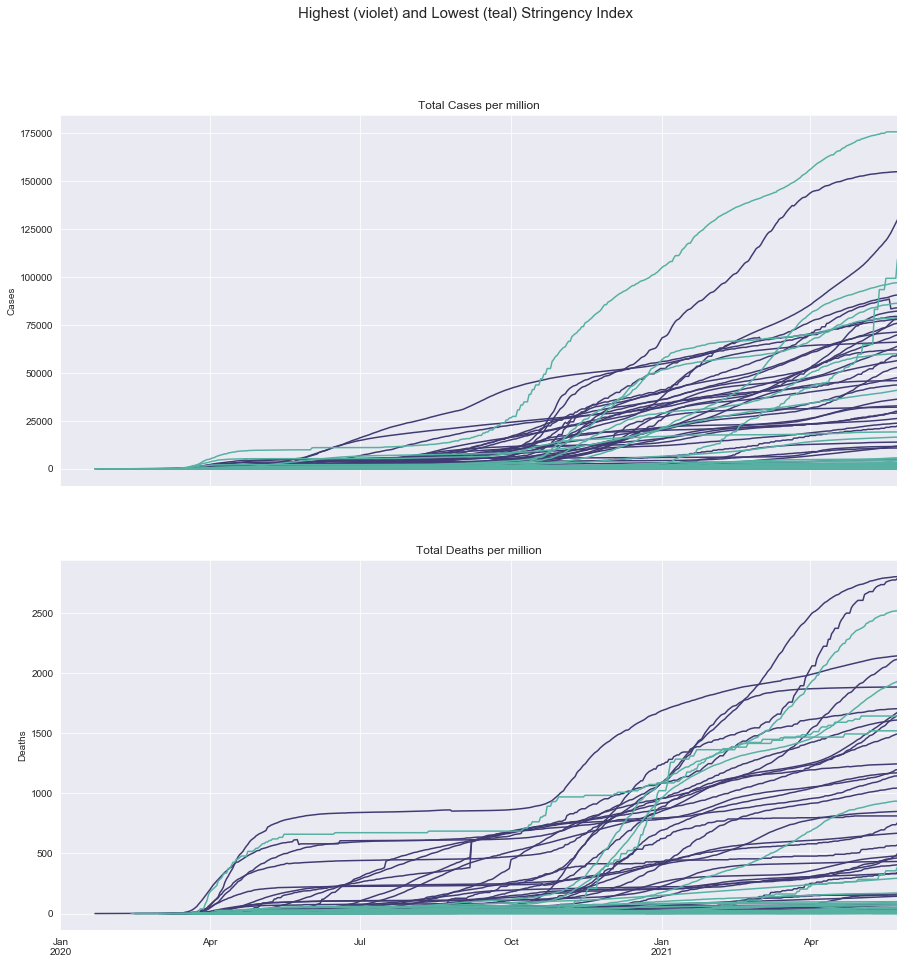

In [140]:
#top/bottom 70 in stringency index
fig, ax = plt.subplots(2,1,figsize=(15,15), sharex=True)

for i in stringency_up50.location.tolist()[:45]:
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-', color='#403c73')
for i in stringency_down50.location.tolist():
    for x, y in enumerate([df[df.location==i].total_cases_per_million]):
        y.plot(ax=ax[0], linestyle='-', color='#56b1a3')
        
for i in stringency_up50.location.tolist()[:45]:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-', color='#403c73')
        #ax[1].annotate(i, xy=(odf.index.max(), odf[odf.location==i].total_deaths_per_million.max()))
for i in stringency_down50.location.tolist():
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-', color='#56b1a3')
        #ax[1].annotate(i, xy=(odf.index.max(), odf[odf.location==i].total_deaths_per_million.max()))

ax[0].set(xlabel = '', ylabel='Cases', title='Total Cases per million')
#ax[0].set_title('Total Cases per million',fontsize=20)
#ax[0].legend(top5_si+bot5_si, fontsize='medium')
ax[1].set(xlabel = '', ylabel='Deaths', title='Total Deaths per million')  
#ax[1].set_title('Total Deaths per million',fontsize=20)
fig.suptitle('Highest (violet) and Lowest (teal) Stringency Index', fontsize=15)

- Stringency index does not seem like a good indicator of COVID19 outcome

In [112]:
#top 10 SI
zf.sort_values(by='stringency_index', ascending=False).head(10)[['location','stringency_index','total_deaths_per_million','total_cases_per_million']]

location  stringency_index  total_deaths_per_million  \
83     Honduras         86.862225                231.893054   
57      Eritrea         86.121945                  2.013985   
210   Venezuela         84.875157                 24.927874   
110       Libya         82.735704                144.042402   
17   Bangladesh         78.723595                 30.356811   
166   Palestine         78.156588                171.734432   
129     Myanmar         77.919418                 24.664108   
40     Colombia         76.921442                573.535719   
12   Azerbaijan         76.742331                138.304136   
159      Panama         75.915938                634.973729   

     total_cases_per_million  
83               8524.072355  
57                293.160712  
210              2575.569626  
110              8907.256644  
17               2037.425714  
166             15745.729939  
129              1098.169473  
40              20212.481033  
12              10119.875247  
159             35320.722261

In [113]:
#bottom 10 SI
zf.sort_values(by='stringency_index', ascending=True).head(10)[['location','stringency_index','total_deaths_per_million','total_cases_per_million']].dropna()

location  stringency_index  total_deaths_per_million  \
141  Nicaragua         13.665124                 18.608428   
13     Burundi         14.989549                  0.162473   
22     Belarus         19.320930                111.387913   
202   Tanzania         22.118478                  0.330445   
212    Vanuatu         24.317086                  3.256000   
201     Taiwan         24.556983                  0.292014   
139      Niger         30.830884                  3.897847   
214      Yemen         33.778303                 18.605803   

     total_cases_per_million  
141               641.616745  
13                 80.654857  
22              13715.091130  
202                 7.759460  
212                 5.660670  
201                23.759360  
139                91.801725  
214                68.584326

## Population Density

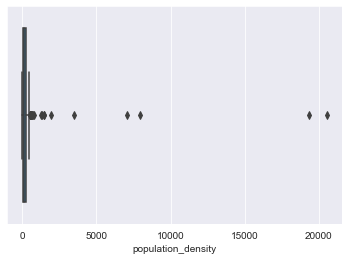

In [137]:
sns.boxplot(odf_totalcases.sort_values(by='population_density').population_density)

In [140]:
odf_totalcases.sort_values(by='population_density',ascending=False).head().population_density

location
Macao        20546.766
Monaco       19347.500
Singapore     7915.731
Hong Kong     7039.714
Gibraltar     3457.100
Name: population_density, dtype: float64

In [110]:
#removing top 5 for better distribution
list_pd = odf_totalcases.sort_values('population_density', ascending=False).head(5).index.tolist()
odf2 = odf_totalcases.copy()
odf2.drop(labels=list_pd, axis=0, inplace=True)

In [117]:
odf2.population_density.describe()

count     194.000000
mean      170.266691
std       263.676519
min         0.137000
25%        35.972500
50%        83.142000
75%       208.157000
max      1935.907000
Name: population_density, dtype: float64

In [115]:
fig = px.choropleth(odf2, locations='iso_code',
                    color='population_density',
                    hover_name=odf2.index, 
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

## Hospital beds per thousand
- may act as a mitigator for COVID19 deaths in larger populations

In [84]:
fig = px.choropleth(odf_totalcases, locations='iso_code',
                    color='hospital_beds_per_thousand',
                    hover_name=odf_totalcases.index, 
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [155]:
hbdf = odf_totalcases.sort_values(by='hospital_beds_per_thousand', ascending=False)[['hospital_beds_per_thousand',
                                                                                     'total_deaths_per_million',
                                                                                     'median_age','population',
                                                                                     'population_density']].dropna()
hbdf.reset_index(inplace=True)
hbdf.head(15)

location  hospital_beds_per_thousand  total_deaths_per_million  \
0         Japan                      13.050                    82.553   
1   South Korea                      12.270                    36.026   
2       Belarus                      11.000                   273.247   
3       Ukraine                       8.800                  1069.677   
4        Russia                       8.050                   751.502   
5       Germany                       8.000                  1001.266   
6      Bulgaria                       7.454                  2390.319   
7       Austria                       7.370                  1142.632   
8       Hungary                       7.020                  2903.104   
9      Mongolia                       7.000                    39.655   
10      Romania                       6.892                  1480.116   
11   Kazakhstan                       6.700                   178.785   
12      Czechia                       6.630                  2747.320   
13       Poland                       6.620                  1800.241   
14    Lithuania                       6.560                  1460.535   

    median_age   population  population_density  
0         48.2  126476458.0             347.778  
1         43.4   51269183.0             527.967  
2         40.3    9449321.0              46.858  
3         41.4   43733759.0              77.390  
4         39.6  145934460.0               8.823  
5         46.6   83783945.0             237.016  
6         44.7    6948445.0              65.180  
7         44.4    9006400.0             106.749  
8         43.4    9660350.0             108.043  
9         28.6    3278292.0               1.980  
10        43.0   19237682.0              85.129  
11        30.6   18776707.0               6.681  
12        43.3   10708982.0             137.176  
13        41.8   37846605.0             124.027  
14        43.5    2722291.0              45.135

- the relationship between dpm and hospital beds is not as strong, however among high density. high median age populations like Japan and Korea, it may mitigate dpm

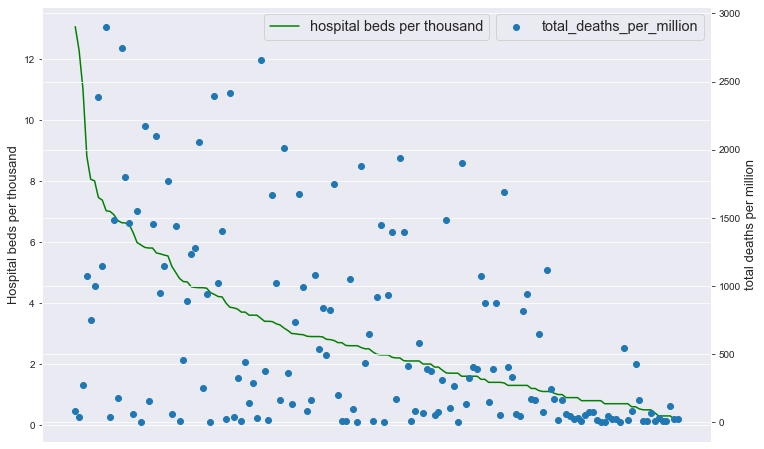

In [157]:
fig, host = plt.subplots(figsize=(12,8))
par1 = host.twinx()

host.set_xlim(auto=True)
host.set_xticks([])
host.set_ylim(auto=True)
par1.set_ylim(auto=True)

host.set_ylabel('Hospital beds per thousand', fontsize=13)
par1.set_ylabel('total deaths per million', fontsize=13)
p1 = host.plot(np.array(hbdf.hospital_beds_per_thousand.values), color='g')
p2 = par1.scatter(x=np.arange(0,len(hbdf)),y=np.array(hbdf.total_deaths_per_million.values))
host.legend(labels=['hospital beds per thousand'], loc='upper center', fontsize='x-large')
par1.legend(labels=['total_deaths_per_million'], loc='upper right', fontsize='x-large')


In [158]:
mdf = hbdf[hbdf.median_age>42]

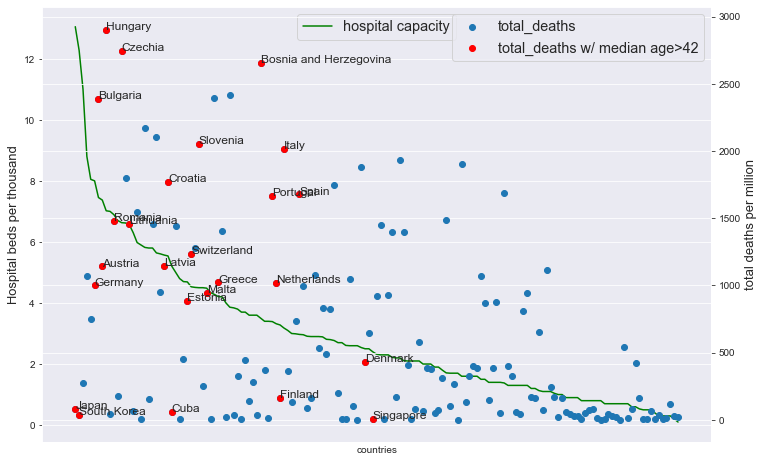

In [159]:
fig, host = plt.subplots(figsize=(12,8))
par1 = host.twinx()

host.set_xlim(auto=True)
host.set_xticks([])
host.set_ylim(auto=True)
par1.set_ylim(auto=True)

host.set_xlabel('countries')
host.set_ylabel('Hospital beds per thousand', fontsize=13)
par1.set_ylabel('total deaths per million', fontsize=13)
p1 = host.plot(np.array(hbdf.hospital_beds_per_thousand.values), color='g')
p2 = par1.scatter(x=np.arange(0,len(hbdf)),y=np.array(hbdf.total_deaths_per_million.values))
p22 = par1.scatter(x=np.array(mdf.index.tolist()), y=np.array(mdf.total_deaths_per_million.values), color='r')
host.legend(labels=['hospital capacity'], loc='upper center', fontsize='x-large')
par1.legend(labels=['total_deaths','total_deaths w/ median age>42'], loc='upper right', fontsize='x-large')

for i in range(mdf.shape[0]):
    plt.annotate(mdf.location.tolist()[i], (mdf.index.tolist()[i], mdf.total_deaths_per_million.tolist()[i]),fontsize=12)

- It may be that beds are most effective after some threshold value. 
    - ie. all countries above 8 beds/thousand have very good COVID19 outcomes, within the same population cohort
- median age and hospital beds per thousand are moderately positively correlated with a pearson coefficient of 0.66

## Female Smokers

In [160]:
fsdf = odf_totalcases.sort_values(by='female_smokers', ascending=False)[['hospital_beds_per_thousand',
                                                                         'total_deaths_per_million',
                                                                         'male_smokers',
                                                                         'female_smokers',
                                                                         'median_age']].dropna()
fsdf.reset_index(inplace=True)

In [161]:
mddf = fsdf[fsdf.median_age>42]

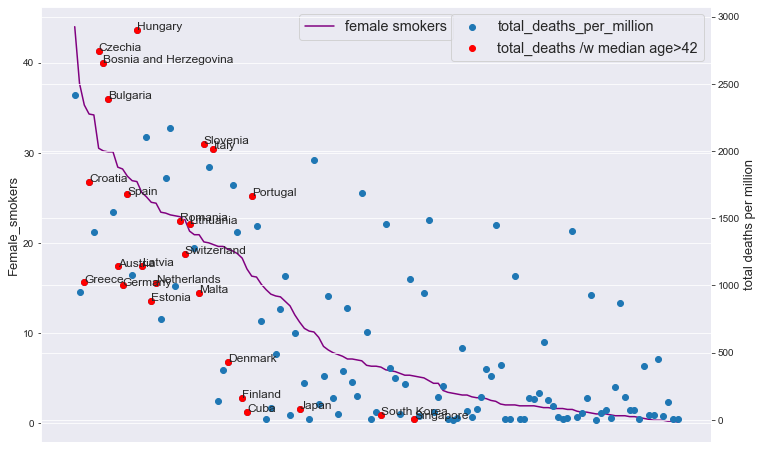

In [162]:
fig, host = plt.subplots(figsize=(12,8))
par1 = host.twinx()

host.set_xlim(auto=True)
host.set_xticks([])
host.set_ylim(auto=True)
par1.set_ylim(auto=True)

host.set_ylabel('Female_smokers', fontsize=13)
par1.set_ylabel('total deaths per million', fontsize=13)
p1 = host.plot(np.array(fsdf.female_smokers.values), color='purple')
p2 = par1.scatter(x=np.arange(0,len(fsdf)),y=np.array(fsdf.total_deaths_per_million.values))
p22 = par1.scatter(x=np.array(mddf.index.tolist()), y=np.array(mddf.total_deaths_per_million.values), color='r')
host.legend(labels=['female smokers'], loc='upper center', fontsize='x-large')
par1.legend(labels=['total_deaths_per_million', 'total_deaths /w median age>42'], loc='upper right', fontsize='x-large')


for i in range(mddf.shape[0]):
    plt.annotate(mddf.location.tolist()[i], (mddf.index.tolist()[i], mddf.total_deaths_per_million.tolist()[i]),fontsize=12)


- female smoker correlation is very strong
- pearson correlation femalesmokers vs total_deaths_per_million = 0.69 which is a strong positive correlation


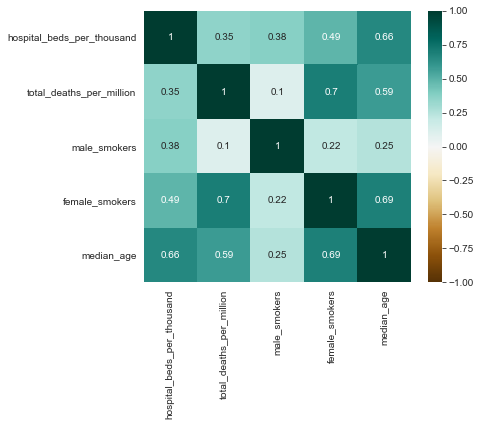

In [163]:
plt.figure(figsize=(6,5))
sns.heatmap(fsdf.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [164]:
msdf = odf_totalcases.sort_values(by='male_smokers', ascending=False)[['hospital_beds_per_thousand',
                                                                       'total_deaths_per_million',
                                                                       'male_smokers',
                                                                       'female_smokers',
                                                                       'gdp_per_capita',
                                                                       'median_age']].dropna()
msdf.reset_index(inplace=True)

In [165]:
mmdf = msdf[msdf.median_age>42]

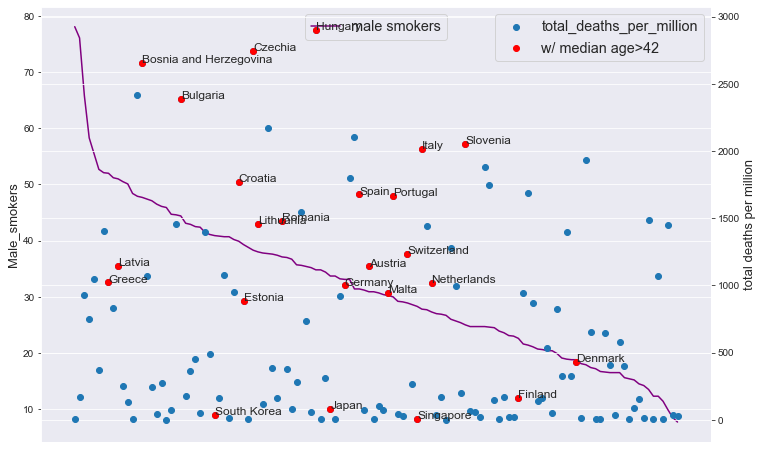

In [166]:
fig, host = plt.subplots(figsize=(12,8))
par1 = host.twinx()

host.set_xlim(auto=True)
host.set_xticks([])
host.set_ylim(auto=True)
par1.set_ylim(auto=True)

host.set_ylabel('Male_smokers', fontsize=13)
par1.set_ylabel('total deaths per million', fontsize=13)
p1 = host.plot(np.array(msdf.male_smokers.values), color='purple')
p2 = par1.scatter(x=np.arange(0,len(msdf)),y=np.array(msdf.total_deaths_per_million.values))
p22 = par1.scatter(x=np.array(mmdf.index.tolist()), y=np.array(mmdf.total_deaths_per_million.values), color='r')
host.legend(labels=['male smokers'], loc='upper center', fontsize='x-large')
par1.legend(labels=['total_deaths_per_million', 'w/ median age>42'], loc='upper right', fontsize='x-large')

for i in range(mmdf.shape[0]):
    plt.annotate(mmdf.location.tolist()[i], (mmdf.index.tolist()[i], mmdf.total_deaths_per_million.tolist()[i]),fontsize=12)

In [86]:
pd.set_option('display.float_format', '{:.2f}'.format)
hbpt = odf_totalcases[odf_totalcases.population.between(100000000,200000000)][['total_deaths_per_million','total_cases_per_million','population','population_density','hospital_beds_per_thousand']].sort_values(by='total_deaths_per_million')

In [87]:
hbpt.sort_values(by='hospital_beds_per_thousand', ascending=False)

total_deaths_per_million  total_cases_per_million   population  \
location                                                                      
Japan                           78.58                  4495.86 126476458.00   
Russia                         729.33                 32265.44 145934460.00   
Egypt                          127.51                  2174.47 102334403.00   
Mexico                        1667.12                 18058.96 128932753.00   
Philippines                    153.16                  9103.06 109581085.00   
Bangladesh                      67.11                  4525.62 164689383.00   
Ethiopia                        30.89                  2194.43 114963583.00   

             population_density  hospital_beds_per_thousand  
location                                                     
Japan                    347.78                       13.05  
Russia                     8.82                        8.05  
Egypt                     98.00                        1.60  
Mexico                    66.44                        1.38  
Philippines              351.87                        1.00  
Bangladesh              1265.04                        0.80  
Ethiopia                 104.96                        0.30

In [167]:
odf_hb7 = odf_totalcases[odf_totalcases.hospital_beds_per_thousand>6]
odf_hb6 = odf_totalcases[odf_totalcases.hospital_beds_per_thousand<6]

top5_hbpt = odf_totalcases.sort_values(by='hospital_beds_per_thousand', ascending=False).head(5).index.tolist()
bot5_hbpt = odf_totalcases.sort_values(by='hospital_beds_per_thousand', ascending=True).head(5).index.tolist()

[Text(0, 0.5, 'Population'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Total deaths per million')]

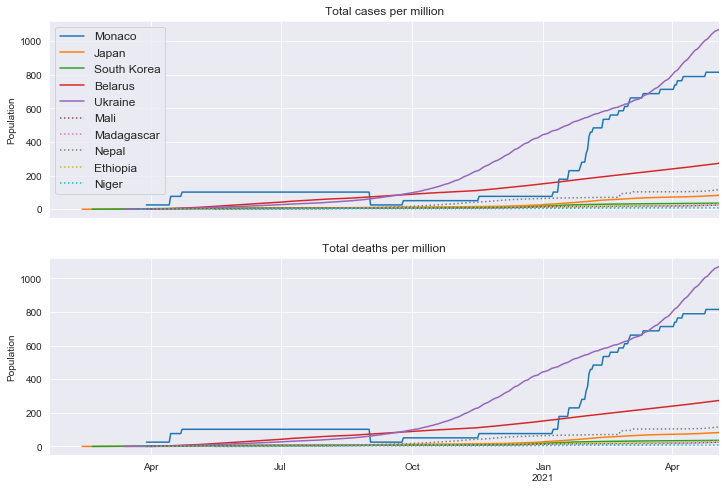

In [168]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)

for i in top5_hbpt:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[0], linestyle='-')
for i in bot5_hbpt:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[0], linestyle='dotted')

for i in top5_hbpt:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='-')
for i in bot5_hbpt:
    for x, y in enumerate([df[df.location==i].total_deaths_per_million]):
        y.plot(ax=ax[1], linestyle='dotted')

ax[0].set(xlabel = '', ylabel='Population', title = 'Total cases per million')  
ax[0].legend(top5_hbpt+bot5_hbpt, fontsize='large')
ax[1].set(xlabel = '', ylabel='Population', title = 'Total deaths per million')  



# Other Correlations

In [170]:
#Removing redundant columns
#some columns are removed due to redundancy
OWIDdf = OWIDdf.drop(columns=['aged_65_older','aged_70_older','iso_code','continent'])

In [171]:
odft=odf_totalcases.copy()
list_ts = [col for col in odft.columns if 'new' in col or 'total' in col or 'people' in col]
odft = odft.drop(columns=['aged_65_older','aged_70_older','iso_code','continent','reproduction_rate','positive_rate','tests_per_case']+list_ts)

In [172]:
odft.describe()

stringency_index    population  population_density  median_age  \
count        180.000000  2.090000e+02          199.000000  186.000000   
mean          82.847444  3.712219e+07          458.987683   30.327419   
std           15.687262  1.428339e+08         2129.379124    9.193067   
min           23.150000  8.090000e+02            0.137000   15.100000   
25%           78.125000  9.880020e+05           36.782500   22.000000   
50%           87.040000  6.948445e+06           87.176000   29.500000   
75%           93.520000  2.637828e+07          213.312000   39.000000   
max          100.000000  1.439324e+09        20546.766000   48.200000   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count      189.000000       124.000000             187.000000   
mean     19238.101741        13.964516             262.562877   
std      20596.923112        20.309717             121.074399   
min        661.240000         0.100000              79.370000   
25%       4227.630000         0.600000             170.667500   
50%      12236.706000         2.350000             243.964000   
75%      27216.445000        21.675000             332.433000   
max     116935.600000        77.600000             724.417000   

       diabetes_prevalence  female_smokers  male_smokers  \
count           194.000000      144.000000    142.000000   
mean              8.102165       10.667361     32.786620   
std               4.390427       10.715532     13.562219   
min               0.990000        0.100000      7.700000   
25%               5.310000        1.900000     21.850000   
50%               7.155000        6.250000     32.250000   
75%              10.420000       19.150000     41.250000   
max              30.530000       44.000000     78.100000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count               94.000000                  168.000000       206.000000   
mean                50.165947                    3.010583        73.281311   
std                 32.044171                    2.443586         7.615703   
min                  1.188000                    0.100000        53.280000   
25%                 19.728000                    1.300000        67.925000   
50%                 48.753000                    2.398500        74.575000   
75%                 82.035250                    3.895750        78.875000   
max                 98.999000                   13.800000        86.750000   

       human_development_index  
count               186.000000  
mean                  0.722403  
std                   0.150654  
min                   0.394000  
25%                   0.601250  
50%                   0.741000  
75%                   0.835750  
max                   0.957000

In [173]:
odft.corr()

stringency_index  population  population_density  \
stringency_index                    1.000000    0.062582           -0.201241   
population                          0.062582    1.000000           -0.028923   
population_density                 -0.201241   -0.028923            1.000000   
median_age                          0.007544    0.033332            0.149079   
gdp_per_capita                     -0.118204   -0.052241            0.408540   
extreme_poverty                    -0.266618   -0.039960           -0.029067   
cardiovasc_death_rate               0.036437   -0.004428           -0.175534   
diabetes_prevalence                 0.064096    0.018770            0.022763   
female_smokers                     -0.062287   -0.121840           -0.046146   
male_smokers                        0.068994    0.025531            0.001161   
handwashing_facilities              0.425196    0.039389            0.102984   
hospital_beds_per_thousand         -0.067432   -0.037812            0.315750   
life_expectancy                    -0.000750   -0.018612            0.232118   
human_development_index             0.068747   -0.015339            0.180550   

                            median_age  gdp_per_capita  extreme_poverty  \
stringency_index              0.007544       -0.118204        -0.266618   
population                    0.033332       -0.052241        -0.039960   
population_density            0.149079        0.408540        -0.029067   
median_age                    1.000000        0.642209        -0.697290   
gdp_per_capita                0.642209        1.000000        -0.507000   
extreme_poverty              -0.697290       -0.507000         1.000000   
cardiovasc_death_rate        -0.337929       -0.474898         0.189471   
diabetes_prevalence           0.155383        0.165931        -0.401898   
female_smokers                0.668069        0.330631        -0.411692   
male_smokers                  0.190170       -0.093290        -0.192223   
handwashing_facilities        0.785879        0.647415        -0.751043   
hospital_beds_per_thousand    0.662063        0.296886        -0.443556   
life_expectancy               0.845453        0.678731        -0.752270   
human_development_index       0.897659        0.754706        -0.777256   

                            cardiovasc_death_rate  diabetes_prevalence  \
stringency_index                         0.036437             0.064096   
population                              -0.004428             0.018770   
population_density                      -0.175534             0.022763   
median_age                              -0.337929             0.155383   
gdp_per_capita                          -0.474898             0.165931   
extreme_poverty                          0.189471            -0.401898   
cardiovasc_death_rate                    1.000000             0.127022   
diabetes_prevalence                      0.127022             1.000000   
female_smokers                          -0.172090             0.037225   
male_smokers                             0.414919             0.177214   
handwashing_facilities                  -0.039956             0.473175   
hospital_beds_per_thousand               0.015253            -0.054206   
life_expectancy                         -0.466057             0.214595   
human_development_index                 -0.425615             0.212657   

                            female_smokers  male_smokers  \
stringency_index                 -0.062287      0.068994   
population                       -0.121840      0.025531   
population_density               -0.046146      0.001161   
median_age                        0.668069      0.190170   
gdp_per_capita                    0.330631     -0.093290   
extreme_poverty                  -0.411692     -0.192223   
cardiovasc_death_rate            -0.172090      0.414919   
diabetes_prevalence               0.037225      0.177214   
female_smokers                    1.000000      0.

In [142]:
import seaborn as sns

save = sns.heatmap(odft.corr()).set_title('OWID dataset Correlation Heatmap')

#save.figure.savefig('heatmap.png')

NameError: name 'odft' is not defined

Text(0.5, 1, 'Features correlating with total_cases')

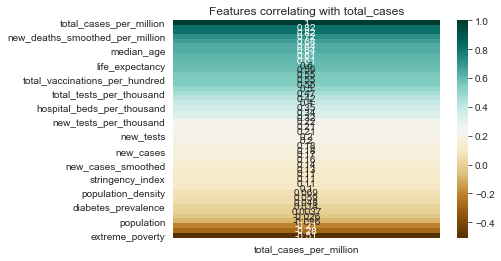

In [175]:
sns.heatmap(odf_totalcases.corr()[['total_cases_per_million']].sort_values(by='total_cases_per_million', ascending=False),
            annot=True, cmap='BrBG').set_title('Features correlating with total_cases')

Text(0.5, 1, 'Features correlating with total_deaths')

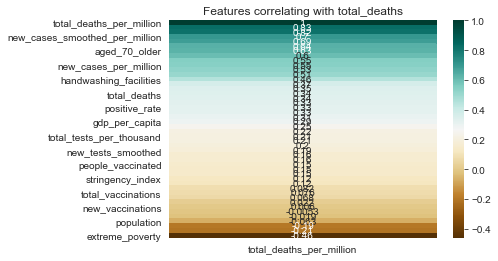

In [176]:
dhmp = sns.heatmap(odf_totalcases.corr()[['total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_deaths')

Some of the target variables to consider: reproduction_rate, total_cases_per_million, total_deaths_per_million.
Normally we would also consider crude mortality rate or case-fatality rate as well. However, confirmed cases is often underreported AND undertested and as such may be harder to evaluate accurately. It is important to consider that the data being robust and accurate relies heavily on the nation's testing capacity. 

Remember that the reproduction rate (R) describes the trajectory of the virus. A value of R = 1 means the amount of new infections and new recoveries are equal; meaning the virus numbers will stagnate. A value of 6.74 means the number of infected is sharply increasing and may lead in a big spike of infections and deaths, depending on government mitigation strategy.

In [847]:
print(OWIDdf.reproduction_rate.max())
odf[odf.reproduction_rate==OWIDdf.reproduction_rate.max()]

5.71


iso_code continent     location  total_cases  new_cases  \
date                                                                 
2020-02-21      KOR      Asia  South Korea        204.0      100.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-02-21              25.143           2.0         1.0                0.286   

            total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
date                                 ...                                    
2020-02-21                    3.979  ...       35938.374              0.2   

            cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
date                                                                     
2020-02-21                 85.998                  6.8             6.2   

            male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
date                                                                           
2020-02-21          40.9                     NaN                       12.27   

            life_expectancy  human_development_index  
date                                                  
2020-02-21            83.03                    0.916  

[1 rows x 50 columns]

# Bubble Visualizations

In [198]:
odf1 = df.groupby(df['location']).agg(['max'])
odf1.columns = odf1.columns.droplevel(1)
odf1.reset_index(level=0, inplace=True)

In [199]:
odf1 = odf1[odf1.population.notna()]

odf1 = odf1[odf1.total_cases.notna()]

odf1 = odf1[odf1.population_density.notna()]

odf1 = odf1[odf1.human_development_index.notna()]

odf1 = odf1[odf1.gdp_per_capita.notna()]

odf1 = odf1[odf1.total_deaths_per_million.notna()]

odf1 = odf1[odf1.life_expectancy.notna()]

In [200]:
odf1 = odf1[-odf1.location.isin(['World','European Union','North America','South America','Asia','Africa','Europe','Oceania'])]

In [201]:
odfpx = odf1.sort_values(by='population_density', ascending=False).head(10)

In [181]:
px.scatter(odf1, x='life_expectancy',y='human_development_index', size='gdp_per_capita',
           color ='continent', hover_name='location',
           title='HDI vs Life_expectancy vs gdp_per_capita')

In [182]:
px.scatter(odf1, x='life_expectancy',y='human_development_index', size='total_deaths_per_million',
           color ='continent', hover_name='location',
           title='HDI vs Life_expectancy vs dpm')

In [183]:
px.scatter(odf1, x='life_expectancy',y='human_development_index', size='median_age',
           color ='continent', hover_name='location',
           title='HDI vs Life_expectancy vs dpm')

- Countries with lower life expectancy, HDI and GDP tend to fare better against COVID deaths
- Possible reason: GDP, HDI lead to better life expectancy, which leads to higher median age
    - effectively a larger proportion of population is at risk

In [184]:
px.scatter(odf1, x='life_expectancy',y='human_development_index', size='diabetes_prevalence',
           color ='continent', hover_name='location',
           title='HDI vs Life_expectancy vs diabetes')

In [185]:
px.scatter(odf1, x='life_expectancy',y='human_development_index', size='cardiovasc_death_rate',
           color ='continent', hover_name='location',
           title='HDI vs Life_expectancy vs cardiovasc')

In [186]:

px.scatter(odf1, x='cardiovasc_death_rate',y='diabetes_prevalence', size='total_deaths_per_million',
           color ='continent', hover_name='location',
           title='cardiovasc vs diabetes vs total_deaths_per_million')

In [187]:
px.scatter(odf1, x='male_smokers',y='female_smokers', size='total_deaths_per_million',
           color ='continent', hover_name='location',
           title='msmoke vs fsmoke vs total_deaths_per_million')

- very strong correlation between female smokers and total dpm

In [202]:
odf1 = odf1[odf1.median_age.notna()]

In [203]:
odf1.sort_values(by='population_density', ascending=False)[['location','population_density']]

location  population_density
177   Singapore            7915.731
16      Bahrain            1935.907
122    Maldives            1454.433
124       Malta            1454.037
17   Bangladesh            1265.036
..          ...                 ...
189    Suriname               3.612
90      Iceland               3.404
12    Australia               3.202
138     Namibia               3.078
132    Mongolia               1.980

[172 rows x 2 columns]

In [224]:
odf1 = odf1[odf1.location!='China']
odf1 = odf1[odf1.location!='India']

In [225]:
px.scatter(odf1, x='population',y='total_deaths_per_million', size='population_density',
           color ='continent', hover_name='location',
           title='population density')

In [204]:
odfdt_vis = odf1[odf1['handwashing_facilities'].notna()]

In [205]:
px.scatter(odfdt_vis,x='total_deaths_per_million',y='handwashing_facilities',
           color='continent', hover_data=['location'],
           title='Handwashing facilities and crude mortality')

The data shows that having more handwashing facilities doesn't necessarily indicate better COVID19 outcomes

In [206]:
px.scatter(odfdt_vis,x='total_deaths_per_million',y='median_age',
           color='location', hover_data=['location'],
           title='median age and dpm')

- Countries with higher median age are typically hit harder

# Data Mining experimenting

## Random Forest Regressor
- Feature importances help develop a feature profile for the strongest affectors of the pandemic
- RF does not need data normalization as it is a tree-based algorithm; there is no distance function

In [252]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [249]:
#removing time-series-attributes
list_nocol = [col for col in df.columns if 'patient' in col
              or 'admissions' in col
              or 'new' in col
              or 'per' in col
              or 'people' in col
              or 'aged' in col
              or 'units' in col]

In [235]:
#removing continents which may overlap data 
cdf = df[-df.location.isin(continents+['World'])]
cdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88730 entries, 2020-02-24 to 2021-05-29
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               88730 non-null  object 
 1   continent                              87759 non-null  object 
 2   location                               88730 non-null  object 
 3   total_cases                            85951 non-null  float64
 4   new_cases                              85946 non-null  float64
 5   new_cases_smoothed                     84976 non-null  float64
 6   total_deaths                           76184 non-null  float64
 7   new_deaths                             76206 non-null  float64
 8   new_deaths_smoothed                    84976 non-null  float64
 9   total_cases_per_million                85473 non-null  float64
 10  new_cases_per_million                  85468 non-null

## RF Importances 

In [264]:
def RFimportances(y, X):
    #Train test split
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
    
    #Imputing median in NA
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    imp = imp.fit(train_X)
    train_X = imp.transform(train_X)

    valimp = SimpleImputer(missing_values=np.nan, strategy='median')
    valimp = valimp.fit(val_X)
    val_X = valimp.transform(val_X)

    val_y = val_y.fillna(val_y.median())
    train_y = train_y.fillna(train_y.median())
    
    #Model fitting
    clf = RandomForestRegressor(n_estimators=100, bootstrap = True, random_state = 1)
    clf = clf.fit(train_X, train_y)
    
    #Model evaluation
    print("Model Evaluation:")
    print('R^2 training set: {:.2f} \nR^2 val set: {:.2f}'.format(clf.score(train_X, train_y),clf.score(val_X, val_y)))
    val_pred = clf.predict(val_X)
    val_mae = mean_absolute_error(val_pred, val_y)
    print("validation MAE: {:,.0f}\n".format(val_mae))

    
    #Feature Importances
    print("Feature Importances")
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]

    for f in range (train_X.shape[1]):
        featurelist = []
        featurelist.append(X.columns[indices[f]])
        print(f"{X.columns.get_loc(X.columns[indices[f]])}\t"
              f"{X.columns[indices[f]]} "
              f"{importances[indices[f]]:.4f}")

    plt.figure(figsize=(12,8))
    plt.title("Feature importances")
    plt.bar(np.arange(len(importances[indices])),importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(train_X.shape[1]), indices)
    plt.xlim([-1, train_X.shape[1]])
    plt.show()
    
    #Permutation importances
    print('Permutation Importances')
    a,c = [],[]
    r = permutation_importance(clf, val_X, val_y)
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            a.append(r.importances_mean[i])
            c.append(r.importances_std[i])
            print(f"{i+1} \t"
                  f"{X.columns[i]:<8} \t"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

    plt.figure(figsize=(12,8))
    plt.title("Permutation importances")
    plt.bar(np.arange(len(a)), a, yerr=c, color="r", align="center")
    plt.xticks(np.arange(len(a)))
    plt.show()

## Target variable: total_deaths

In [250]:
y = df.total_deaths
X = df[df.columns.difference(list_nocol+['iso_code','location','continent','crude_mortality','case_fatality','total_deaths','positive_rate','population','total_cases','tests_units'])] 

Model Evaluation:
R^2 training set: 0.96 
R^2 val set: 0.92
validation MAE: 5,951

Feature Importances
13	total_vaccinations 0.4612
4	handwashing_facilities 0.3367
0	cardiovasc_death_rate 0.0496
2	extreme_poverty 0.0336
9	population_density 0.0271
10	reproduction_rate 0.0243
6	life_expectancy 0.0159
5	human_development_index 0.0157
12	total_tests 0.0111
8	median_age 0.0086
1	diabetes_prevalence 0.0056
7	male_smokers 0.0047
3	female_smokers 0.0041
11	stringency_index 0.0018


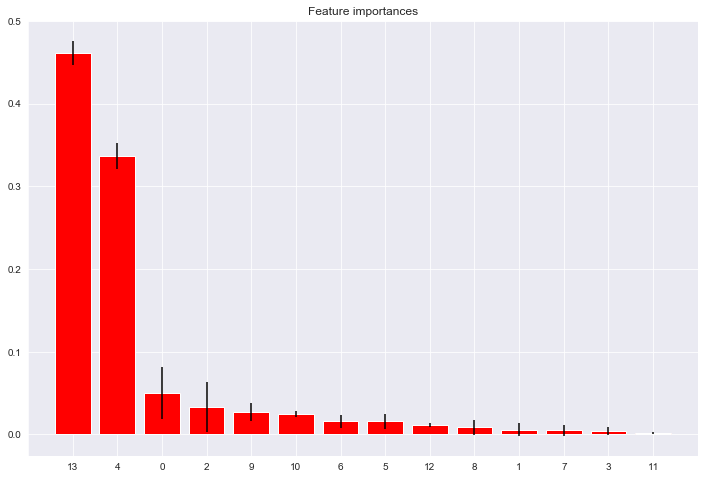

Permutation Importances
14 	total_vaccinations 	1.473 +/- 0.069
5 	handwashing_facilities 	0.515 +/- 0.049
3 	extreme_poverty 	0.315 +/- 0.010
9 	median_age 	0.183 +/- 0.004
1 	cardiovasc_death_rate 	0.125 +/- 0.006
7 	life_expectancy 	0.099 +/- 0.005
6 	human_development_index 	0.092 +/- 0.007
11 	reproduction_rate 	0.072 +/- 0.004
10 	population_density 	0.049 +/- 0.002
13 	total_tests 	0.038 +/- 0.002
4 	female_smokers 	0.009 +/- 0.001
2 	diabetes_prevalence 	0.006 +/- 0.001
8 	male_smokers 	0.004 +/- 0.001
12 	stringency_index 	0.003 +/- 0.000


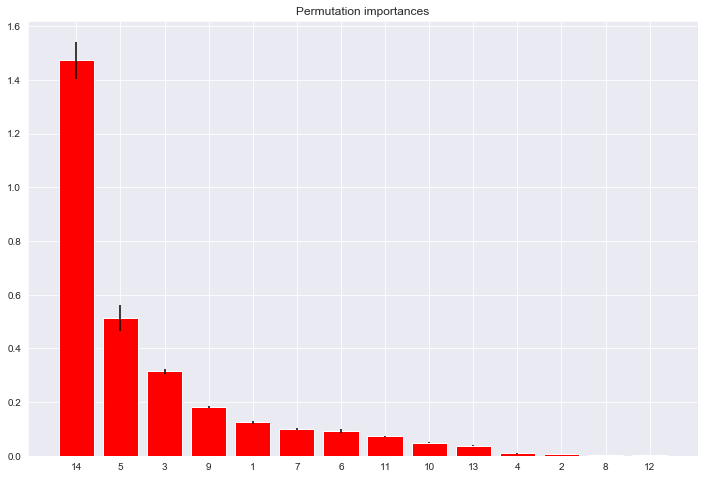

In [258]:
RFimportances(y, X)

## Target variable: total_cases

In [261]:
y = df.total_cases
X = df[df.columns.difference(list_nocol+['iso_code','location','continent','crude_mortality','case_fatality','total_deaths','positive_rate','population','total_cases','tests_units'])] 

Model Evaluation:
R^2 training set: 0.97 
R^2 val set: 0.93
validation MAE: 225,932

Feature Importances
13	total_vaccinations 0.5169
4	handwashing_facilities 0.3225
2	extreme_poverty 0.0527
12	total_tests 0.0181
5	human_development_index 0.0160
10	reproduction_rate 0.0154
8	median_age 0.0144
9	population_density 0.0102
6	life_expectancy 0.0095
0	cardiovasc_death_rate 0.0065
7	male_smokers 0.0064
1	diabetes_prevalence 0.0052
3	female_smokers 0.0047
11	stringency_index 0.0015


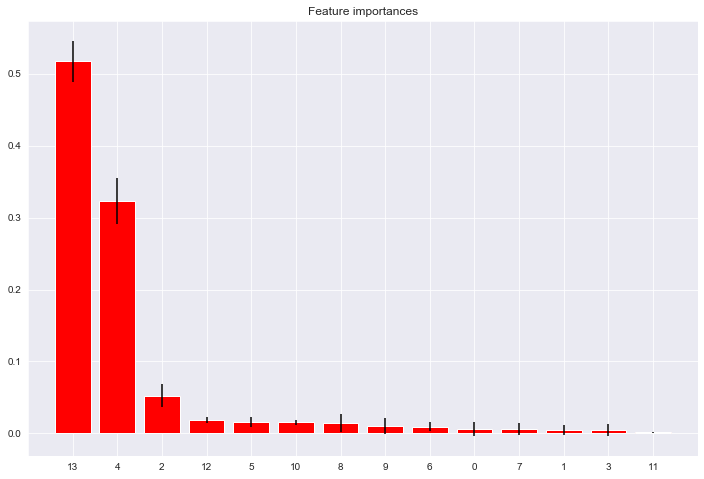

Permutation Importances
14 	total_vaccinations 	1.872 +/- 0.097
3 	extreme_poverty 	0.969 +/- 0.022
9 	median_age 	0.842 +/- 0.033
5 	handwashing_facilities 	0.501 +/- 0.059
6 	human_development_index 	0.165 +/- 0.012
13 	total_tests 	0.104 +/- 0.005
11 	reproduction_rate 	0.037 +/- 0.004
7 	life_expectancy 	0.037 +/- 0.002
1 	cardiovasc_death_rate 	0.013 +/- 0.003
10 	population_density 	0.009 +/- 0.002
4 	female_smokers 	0.006 +/- 0.001
2 	diabetes_prevalence 	0.005 +/- 0.002
12 	stringency_index 	0.004 +/- 0.000
8 	male_smokers 	0.002 +/- 0.001


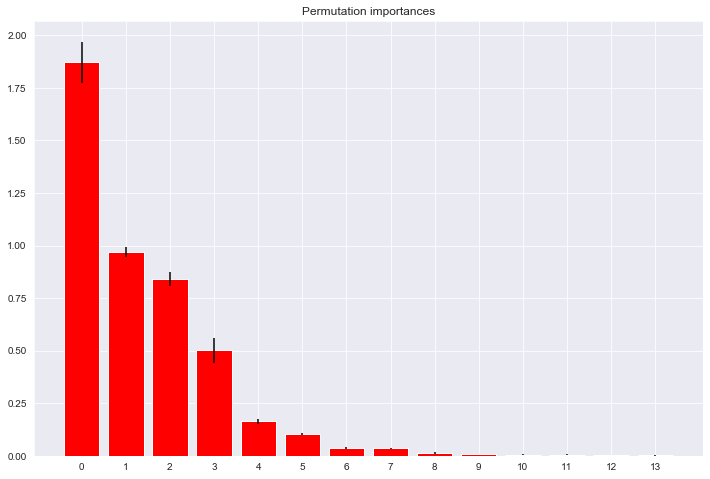

In [265]:
RFimportances(y, X)

- Vaccinations, population density, testing, and female smokers seem to be the strongest features based on these permutation importances for COVID19 outcomes. (as of 03-30)
- Testing is a special case; it doesn't necessarily affect COVID19 spread but affects our view of the data. 
- Each region has different testing regimes and capacity; therefore confirmed cases may not reflect the true number of COVID19 cases. Higher testing capacity will also mean more total cases.

## Crude-Mortality
- weak model

Model Evaluation:
R^2 training set: 0.98 
R^2 val set: -0.43
validation MAE: 0

Feature Importances
13	total_vaccinations 0.2982
3	female_smokers 0.1547
12	total_tests 0.0827
11	stringency_index 0.0763
6	life_expectancy 0.0691
9	population_density 0.0562
5	human_development_index 0.0541
10	reproduction_rate 0.0433
2	extreme_poverty 0.0430
0	cardiovasc_death_rate 0.0366
7	male_smokers 0.0315
1	diabetes_prevalence 0.0256
8	median_age 0.0212
4	handwashing_facilities 0.0073


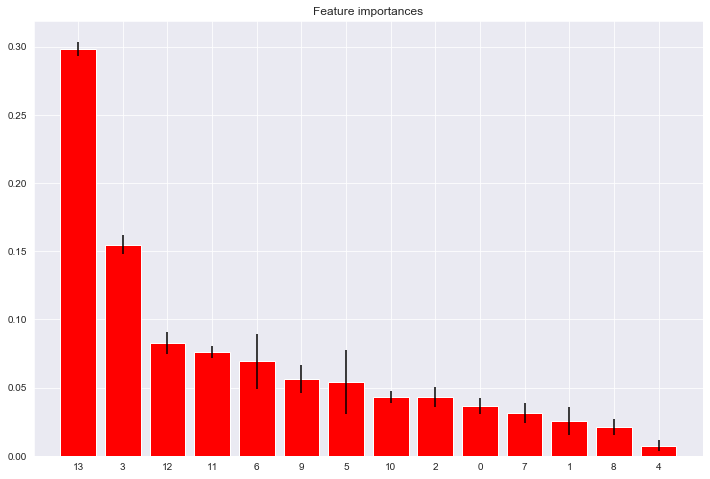

Permutation Importances
4 	female_smokers 	1.271 +/- 0.019
7 	life_expectancy 	0.454 +/- 0.010
9 	median_age 	0.353 +/- 0.008
3 	extreme_poverty 	0.250 +/- 0.005
6 	human_development_index 	0.181 +/- 0.004
8 	male_smokers 	0.149 +/- 0.004
14 	total_vaccinations 	0.148 +/- 0.009
10 	population_density 	0.121 +/- 0.004
13 	total_tests 	0.073 +/- 0.002
1 	cardiovasc_death_rate 	0.039 +/- 0.003
11 	reproduction_rate 	0.019 +/- 0.001


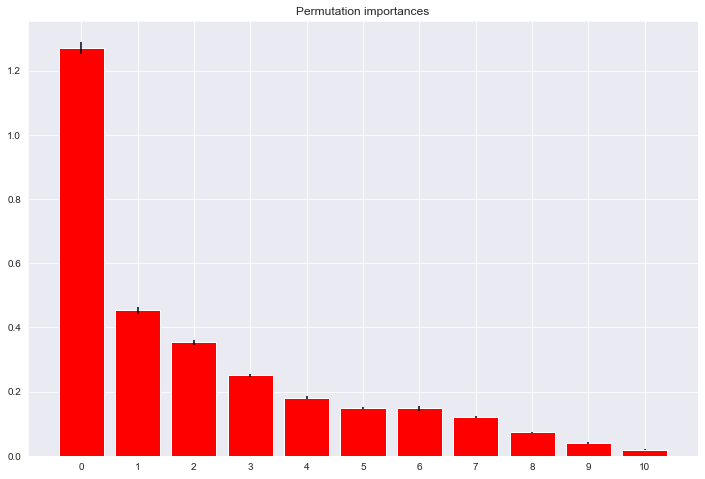

In [266]:
y = df.crude_mortality
X = df[df.columns.difference(list_nocol+['iso_code','location','continent','crude_mortality','case_fatality','total_deaths','positive_rate','population','total_cases','tests_units'])]
RFimportances(y, X)

## Case Fatality
- weak model 

Model Evaluation:
R^2 training set: 0.93 
R^2 val set: 0.71
validation MAE: 0

Feature Importances
11	stringency_index 0.2280
0	cardiovasc_death_rate 0.1080
3	female_smokers 0.1006
10	reproduction_rate 0.0980
1	diabetes_prevalence 0.0801
12	total_tests 0.0788
5	human_development_index 0.0672
8	median_age 0.0571
6	life_expectancy 0.0434
9	population_density 0.0385
7	male_smokers 0.0313
4	handwashing_facilities 0.0260
13	total_vaccinations 0.0216
2	extreme_poverty 0.0215


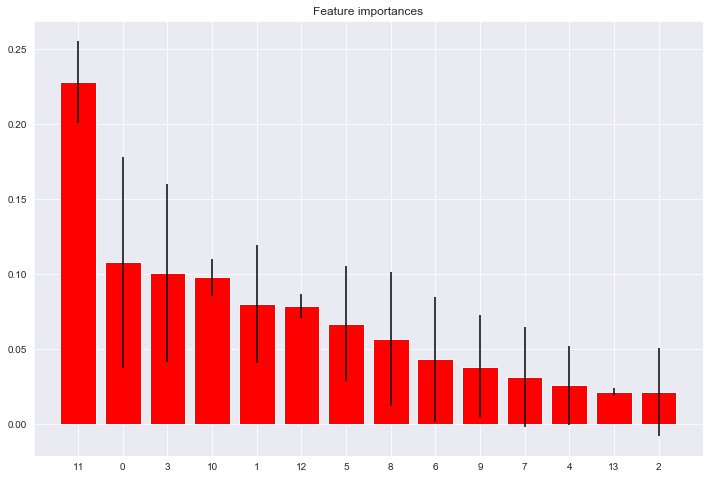

Permutation Importances
6 	human_development_index 	0.683 +/- 0.005
12 	stringency_index 	0.420 +/- 0.025
4 	female_smokers 	0.291 +/- 0.011
1 	cardiovasc_death_rate 	0.247 +/- 0.007
10 	population_density 	0.223 +/- 0.009
2 	diabetes_prevalence 	0.153 +/- 0.039
9 	median_age 	0.141 +/- 0.005
13 	total_tests 	0.126 +/- 0.007
11 	reproduction_rate 	0.104 +/- 0.014
7 	life_expectancy 	0.067 +/- 0.005
5 	handwashing_facilities 	0.049 +/- 0.003
3 	extreme_poverty 	0.037 +/- 0.005
8 	male_smokers 	0.015 +/- 0.001
14 	total_vaccinations 	0.009 +/- 0.000


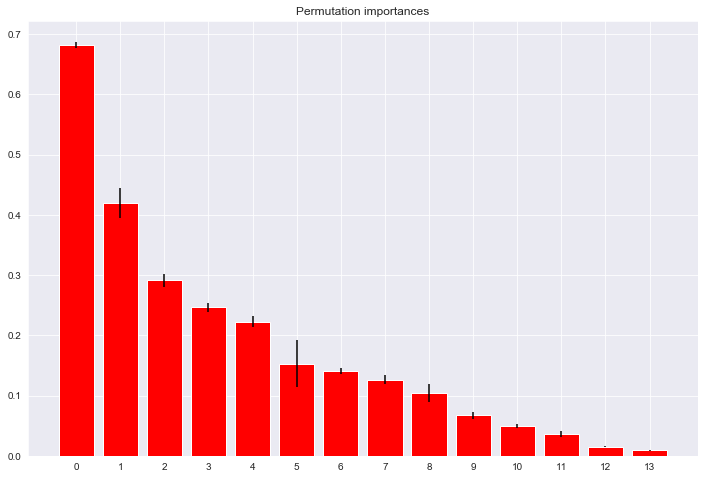

In [267]:
y = df.case_fatality
X = df[df.columns.difference(list_nocol+['iso_code','location','continent','crude_mortality','case_fatality','total_deaths','positive_rate','population','total_cases','tests_units'])]
RFimportances(y, X)

# ARIMA forecasting model
- arima will be used to forecast deaths and cases for the next 30 days in Canada
- pdq parameters will be tuned using a wrapper method 
    - source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7409837/
    - this method tests combinations of pdq values for the lowest AIC

In [228]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

## ARIMA preprocessing

In [227]:
df.describe()

total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  8.339900e+04   83397.000000        82402.000000  7.370300e+04   
mean   5.794680e+05    4045.452378         4043.805032  1.615520e+04   
std    3.006254e+06   20690.445302        20214.508790  7.081724e+04   
min    1.000000e+00  -74347.000000        -6223.000000  1.000000e+00   
25%    9.355000e+02       2.000000            6.857000  4.500000e+01   
50%    1.041800e+04      68.000000           84.143000  3.130000e+02   
75%    1.090960e+05     745.000000          776.393250  2.984000e+03   
max    4.524420e+07  518375.000000       494924.714000  1.025369e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  73861.000000         82402.000000             82946.000000   
mean      96.698434            85.795962             10287.550455   
std      424.261605           384.890159             19678.614687   
min    -1918.000000          -232.143000                 0.001000   
25%        0.000000             0.000000               204.410000   
50%        2.000000             1.143000              1395.313000   
75%       17.000000            13.143000             10079.628500   
max     7554.000000          5608.286000            172341.940000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           82944.000000                    81954.000000   
mean               74.744025                       74.878512   
std               176.908850                      149.649329   
min             -2153.437000                     -276.825000   
25%                 0.183000                        1.154000   
50%                 7.542000                       10.009500   
75%                68.343750                       76.445000   
max              8652.658000                     2648.773000   

       total_deaths_per_million  ...  gdp_per_capita  extreme_poverty  \
count              73263.000000  ...    77319.000000     52480.000000   
mean                 229.113244  ...    19159.036552        13.384221   
std                  401.981273  ...    19884.892070        20.031419   
min                    0.001000  ...      661.240000         0.100000   
25%                    6.857000  ...     4466.507000         0.500000   
50%                   39.647000  ...    12294.876000         2.000000   
75%                  244.494500  ...    27216.445000        21.200000   
max                 2903.104000  ...   116935.600000        77.600000   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
count           77909.000000         79071.000000    60931.000000   
mean              257.984353             7.817799       10.550631   
std               119.126998             3.990647       10.436434   
min                79.370000             0.990000        0.100000   
25%               167.295000             5.290000        1.900000   
50%               243.811000             7.110000        6.200000   
75%               329.635000            10.080000       19.300000   
max               724.417000            30.530000       44.000000   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
count  60026.000000            38918.000000                71046.000000   
mean      32.641809               50.798883                    3.031442   
std       13.527148               31.937483                    2.471305   
min        7.700000                1.188000                    0.100000   
25%       21.400000               19.351000                    1.300000   
50%       31.400000               49.542000                    2.397000   
75%       41.100000               83.241000                    4.000000   
max       78.100000               98.999000                   13.800000   

       life_expectancy  human_development_index  
count     81146.000000             77791.000000  
mean         73.167243                 0.727017  
std           7.571119                 0.150508  
min 

In [229]:
#rolling average for each variable
def cra(country,case='total_cases'):
    ts=df.loc[(df['location']==country)]  
    ts=ts[[case]]
    a=len(ts.loc[(ts[case]>=10)])
    ts=ts[-a:]
    ts.astype('int64')
    return (ts.rolling(window=7,center=False).mean().dropna())


def crplot(country, case='total_cases'):
    ts=df.loc[(df['location']==country)]  
    ts=ts[[case]]
    a=len(ts.loc[(ts[case]>=10)])
    ts=ts[-a:]
    ts.astype('int64')
    
    plt.figure(figsize=(16,6))
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.legend(['Cases', 'Rolling Mean'])
    plt.title(f'{country}: Rolling mean and cases for {case}')

## Stationarity testing

In [230]:
c1 = cra('Canada',case='total_cases')

In [231]:
def stationarity(ts):
    print('Augmented Dickey-Fuller test: Canada\'s total_cases')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations'])
    print(results)

stationarity(c1.total_cases.values)

Augmented Dickey-Fuller test: Canada's total_cases
Test Statistic              1.557522
p-value                     0.997724
Lags Used                  16.000000
Number of Observations    413.000000
dtype: float64


The p-value tells us the likelihood of stationarity. Because this p-value is over the alpha limit, we cannot reject the null hypothesis that the data contains a unit root, and the data may be non-stationary. 
ARIMA is a good model in this case, with differencing.

Augmented Dickey-Fuller test: Canada's total_cases
Test Statistic              1.557522
p-value                     0.997724
Lags Used                  16.000000
Number of Observations    413.000000
dtype: float64


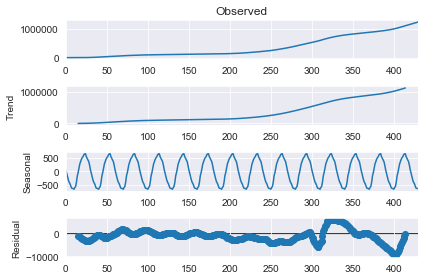

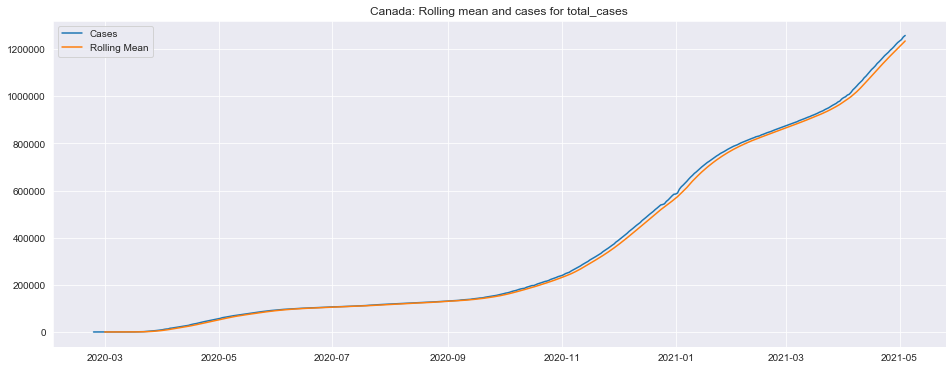

In [232]:
stationarity(cra('Canada').total_cases.values)
fig = sm.tsa.seasonal_decompose(cra('Canada').values, period = 30).plot()
crplot('Canada')

Augmented Dickey-Fuller test: Canada's total_cases
Test Statistic             1.70
p-value                    1.00
Lags Used                 16.00
Number of Observations   395.00
dtype: float64


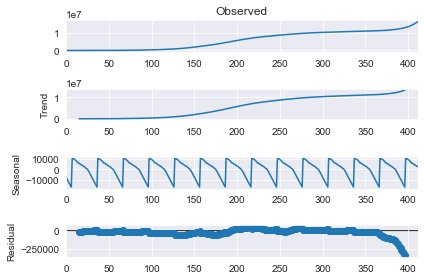

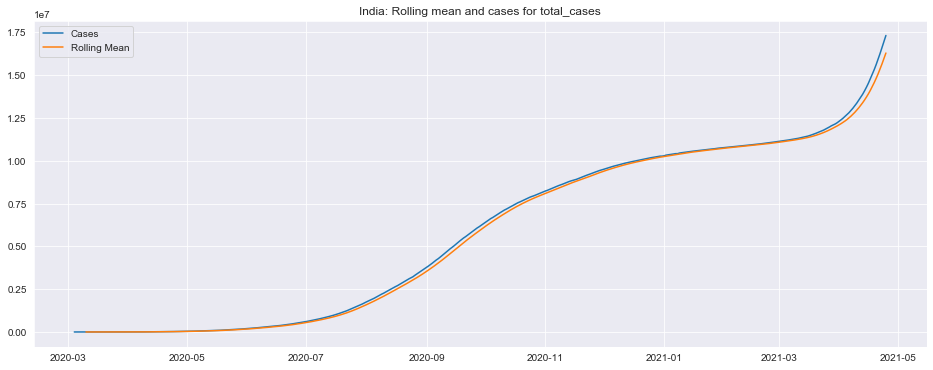

In [100]:
#other countries for curiosity
stationarity(cra('India').total_cases.values)
fig = sm.tsa.seasonal_decompose(cra('India').values, period = 30).plot()
crplot('India')

Augmented Dickey-Fuller test: Canada's total_cases
Test Statistic            -0.61
p-value                    0.87
Lags Used                 18.00
Number of Observations   435.00
dtype: float64


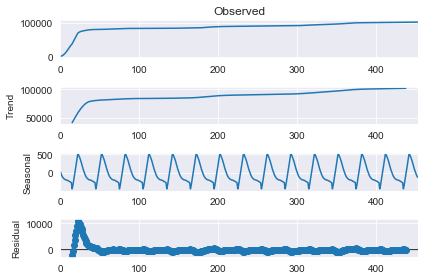

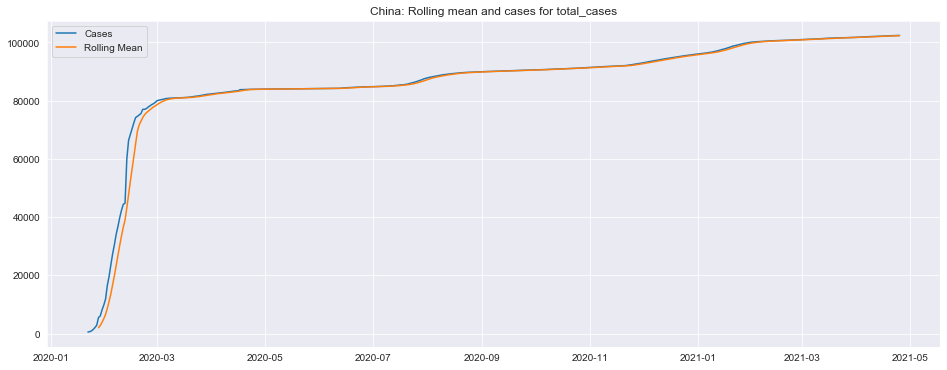

In [101]:
stationarity(cra('China').total_cases.values)
fig = sm.tsa.seasonal_decompose(cra('China').values, period = 30).plot()
crplot('China')

## ACF and PACF

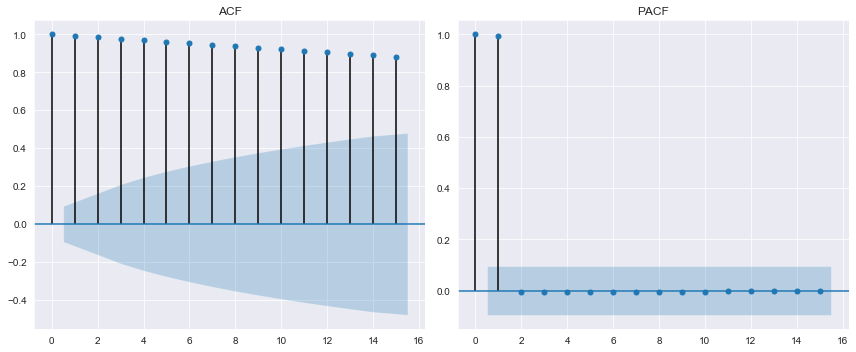

In [233]:
def autocorr(ts):
    plt.figure(figsize=(12,5))
    layout = (1, 2)
    
    ax_acf= plt.subplot2grid(layout, (0, 0))
    ax_pacf = plt.subplot2grid(layout, (0, 1))
    
    plot_acf(ts, lags=15, title='ACF', ax=ax_acf)
    plot_pacf(ts, lags=15, title='PACF', ax=ax_pacf)
    plt.tight_layout()
    
autocorr(cra('Canada'))
#ACF and PACF for Canada;

- normally ACF helps determine q and PACF determines p, but I will be using a function to optimize AIC to deliver best results

## ARIMA Modeling
- predictions using the model will be 30 days from today

In [250]:
#Train-test splitting on time series data
def split(ts):
    date = int(len(ts) * 0.85)
    train = ts[:date]
    test = ts[date:]
    return(train, test)

#(p,D,q) hyperparameter evaluation based on AIC
def arima(ts,test):
    p = d = q = range(0,6)
    x = 100000
    pdq = list(itertools.product(p,d,q))
    
    for combo in pdq:
        try:
            model = ARIMA(ts, order=combo)
            result = model.fit()
            if (result.aic <= x):
                x = result.aic
                param = combo
        except:
            continue
    return param

def rmse(y1, y_pred):
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.sqrt(mean_squared_error(y1, y_pred))

def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def ARIMAmodel(country, case):
    c1 = cra(country, case)
    series = c1[case].values
    train,test=split(series)
    pdq = arima(train,test)

    #Modeling
    model = ARIMA(train, order=pdq)
    result = model.fit()
    return result


In [244]:
def ARIMAfigs(result, case, days = 30):
    
    c = cra('Canada',case=case)
    train, test = split(c[case].values)
    z, y = np.hstack(train), np.hstack(test)
    length = len(z) + len(y)
    zy = pd.DataFrame({'x':range(len(z)-10,len(z)+len(y)-10), 'y':y})
    zy.set_index('x', inplace=True)
    
    plt.figure(figsize=(15,10))
    layout=(1,1)

    #days forecasted
    forecast = plt.subplot2grid(layout, (0,0))
    plt.setp(forecast, 
             xticks=[0,length/5,(length/5)*2,(length/5)*3,(length/5)*4,length-10,length+days],
             xticklabels=[str(c.index.min())[:10],'','','','',str(c.index.max())[:10],''])
    
    #Predict the test set + next 30 days
    result.plot_predict(start=10, end=length+days, ax=forecast)
    forecast.legend(fontsize='xx-large', loc='upper left')
    forecast.tick_params(axis='x', labelsize=15)
    forecast.tick_params(axis='y', labelsize=13)
    forecast.set_ylabel(f'COVID19 {case}', fontsize=15)
    forecast.set_title(f'ARIMA Model Predictions for COVID19 {case} in Canada', fontsize=20 )
    pred=result.forecast(steps=len(test))[0]
    
    #Model Error plots
    fig, ax = plt.subplots(1, 2, figsize=(16,4))

    ax[0].plot(pred, c='#1f77b4', label = 'Predicted')
    ax[0].plot(test, c='r', label = 'Actual')
    forecast.plot(zy, c='r', label = 'Actual')
    ax[1].plot(pred-y, c='purple', label = 'Residuals', marker='*')
    plt.setp(ax[0], xticks=[0, len(pred)], xticklabels=[str(c.index[len(z)+1])[:10], str(c.index.max())[:10]])
    ax[1].tick_params(axis='x', labelsize=13)
    fig.suptitle('ARIMA Model error', fontsize=20 )
    
    ax[1].annotate(f"RMSE:{rmse(test,pred):.3f}\nMAPE:{mape(test,pred):.3f}\n",
                   xy=(0.05, 0.55), fontsize=15,
                   xycoords = 'axes fraction', xytext=(0.05,0.55))
    
    forecast.legend(['Forecast', 'Actual', 'Actual(test set)', '95% CI'], loc = 'upper left', fontsize='xx-large')
    ax[0].legend(loc='upper left', fontsize='x-large')
    ax[1].legend(loc='upper left', fontsize='x-large')
    
    #creating the predictions list
    datelist = pd.date_range(c.index.max(), periods=days).tolist()
    dates = []
    for date in datelist:
        dates.append(str(date)[:10])
    oospred = result.forecast(steps=len(test)+days)[0]
    fpreds = pd.DataFrame({'Date':dates,'OOS Preds':oospred[len(test):]})
    
    print(result.summary(), '\n')
    print('Evaluation metrics:\n'
          f"RMSE:{rmse(test,pred):.3f}\n"
          f"MAPE:{mape(test,pred):.3f}\n")
    print(f'{days} day predictions\n', fpreds)

In [239]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', HessianInversionWarning)

model_td = ARIMAmodel(country='Canada', case='total_deaths')
model_tc = ARIMAmodel(country='Canada', case='total_cases')

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  363
Model:                 ARIMA(5, 2, 5)   Log Likelihood               -2268.434
Method:                       css-mle   S.D. of innovations            123.239
Date:                Wed, 05 May 2021   AIC                           4560.869
Time:                        04:34:57   BIC                           4607.602
Sample:                             2   HQIC                          4579.445
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0657     15.957      0.505      0.613     -23.210      39.342
ar.L1.D2.y     0.3065      0.096      3.205      0.001       0.119       0.494
ar.L2.D2.y     0.2830      0.056      5.093      0.0

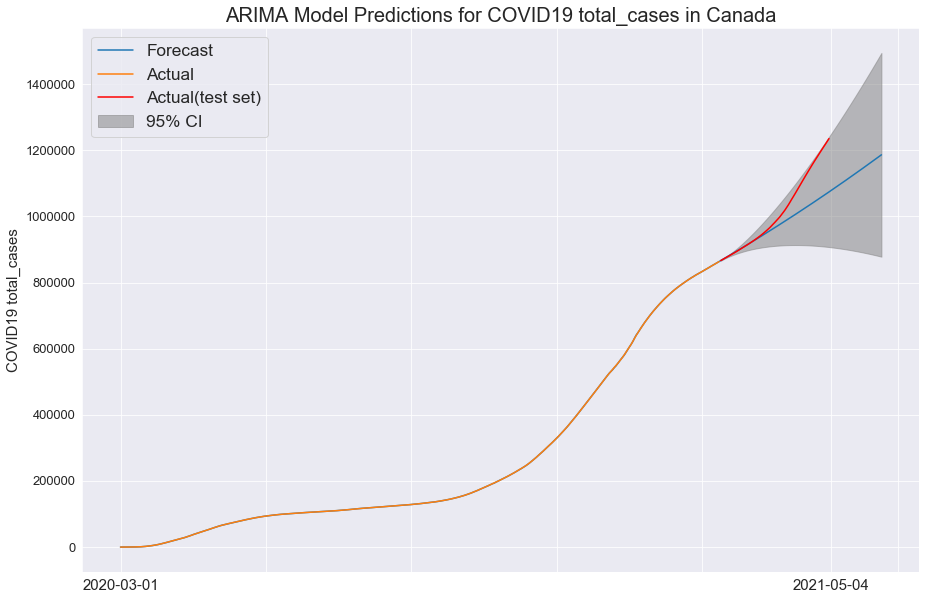

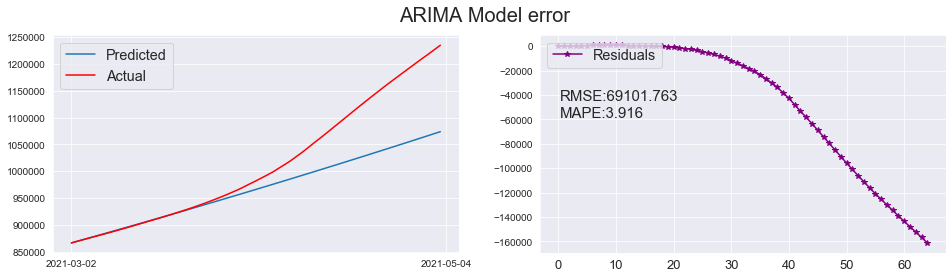

In [251]:
ARIMAfigs(model_tc, case='total_cases')

-As of May 1: this arima model fails because the train data ends before the 3rd wave spike in cases

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  343
Model:                 ARIMA(5, 2, 3)   Log Likelihood                -884.379
Method:                       css-mle   S.D. of innovations              3.154
Date:                Wed, 05 May 2021   AIC                           1788.758
Time:                        04:33:30   BIC                           1827.135
Sample:                             2   HQIC                          1804.045
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1530      0.865      0.177      0.860      -1.543       1.849
ar.L1.D2.y     0.3516      0.086      4.065      0.000       0.182       0.521
ar.L2.D2.y    -0.3485      0.061     -5.733      0.0

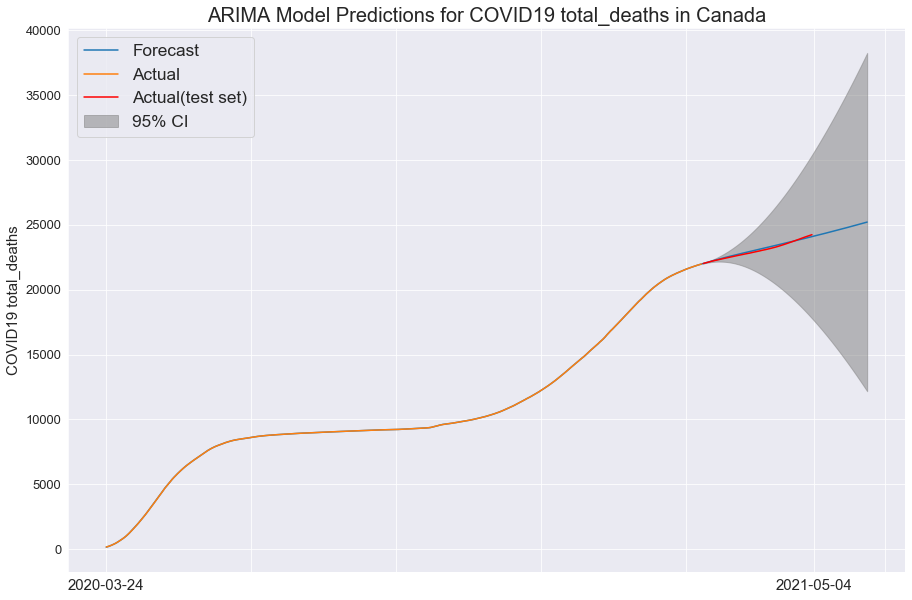

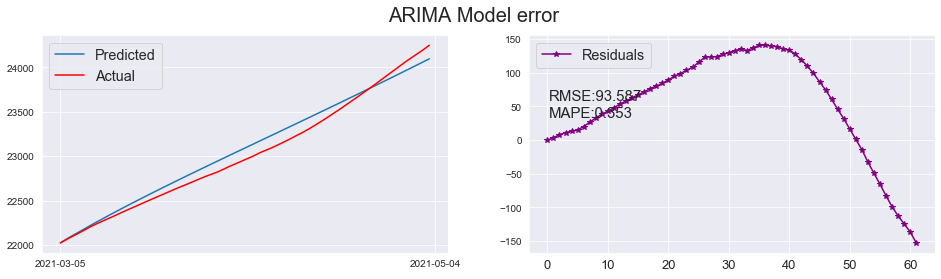

In [246]:
ARIMAfigs(model_td, case='total_deaths')

- The ARIMA(5,2,5) for cases and ARIMA(5,2,4) for deaths were relatively robust for the first 30 days and predicted the trajectory of COVID19 with moderate succuss
- ARIMA as a simple model is a robust forecast in some areas but does not account for randomness or erratic behavior as observed with COVID waves and spikes

# Summary
Analysis of pandemic data is crucial for preparation of the next pandemic event.
- Strongest demographic factors for COVID19 outcomes are median age, female smoker population, population density. 
- Key mitigators may be hospital beds per thousand, and total vaccinations.
- It is important to note that total testing's high correlation to target variables is because testing reveals true cases. Total cases may not be an accurate indicator of true cases because testing capacity and rate differs between regions. In general, it is better to focus on a crude mortality rate instead of case-fatality rate or metrics derived from total cases. 


# Dashboard visualization using Dash and plotly_express libraries
- work in progress

In [15]:
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [16]:
list(df.columns[4:16])

['new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate']

In [17]:
np.array(cf.columns[4:16])

array(['new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate'],
      dtype=object)

In [19]:
cf_array = np.array(cf)

In [42]:
#learning dash, ignore for now
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')

#available_indicators = df['Indicator Name'].unique()
#available_indicators = np.array(cf.columns[4:16])

app.layout = html.Div([
    html.Div([

# x axis crossfilter
#         html.Div([
#             dcc.Dropdown(
#                 id='crossfilter-xaxis-column',
#                 options=[{'label': i, 'value': i} for i in available_indicators],
#                 value='Fertility rate, total (births per woman)'
#             ),
#             dcc.RadioItems(
#                 id='crossfilter-xaxis-type',
#                 options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
#                 value='Linear',
#                 labelStyle={'display': 'inline-block'}
#             )
#         ],
#         style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

#     html.Div(dcc.Slider(
#         id='crossfilter-year--slider',
#         min=df['Year'].min(),
#         max=df['Year'].max(),
#         value=df['Year'].max(),
#         marks={str(year): str(year) for year in df['Year'].unique()},
#         step=None
#     ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@app.callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    [Input('crossfilter-xaxis-column', 'value'),
     Input('crossfilter-yaxis-column', 'value'),
     Input('crossfilter-xaxis-type', 'value'),
     Input('crossfilter-yaxis-type', 'value'),
     Input('crossfilter-year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
            )

    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       bgcolor='rgba(255, 255, 255, 0.5)', text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@app.callback(
    Output('x-time-series', 'figure'),
    [Input('crossfilter-indicator-scatter', 'hoverData'),
     Input('crossfilter-xaxis-column', 'value'),
     Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    Output('y-time-series', 'figure'),
    [Input('crossfilter-indicator-scatter', 'hoverData'),
     Input('crossfilter-yaxis-column', 'value'),
     Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


app.run_server(mode='inline')

Dash app running on http://127.0.0.1:8050/
